# <center>Определение уязвимых групп населения

## <center>Итоговый проект первого года обучения Skillfactory Data Science

## <center>Часть 2. Кластеризация

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import shapiro
from sklearn import cluster, metrics
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import sqeuclidean
from sklearn.pipeline import Pipeline
from sklearn.cluster import SpectralClustering
import pickle
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

### 2.1. Очистка и разведочный анализ данных

Датасет представляет из себя срез усредненных значений экономических и демографических показателей за 2016-2021 г., по которому на момент разработки данного проекта государственными органами предоставлена наиболее полная статистика.
Описание датасета:
| Признак | Описание |
| - | - |
| per_capita | среднемесячный денежный доход на человека, в рублях|
| real_incomes | средние реальные денежные доходы, в процентах к предыдущему году|
| formal_wage | среднемесячная номинальная начисленная заработная плата на человека, в рублях|
| real_pay | средняя реальная начисленная заработная плата, в процентах к предыдущему году|
| child_mortality | средняя детская смертность, в процентах от количества новорожденных|
| disabled | средняя инвалидность среди трудоспособного возраста, в процентах к населению соответствующего возраста (оценочно)|
| alco | среднее количество впервые зарегистрированных алкогольных психозов на 100 тыс. населения|
| drug | среднее количество впервые зарегистрированных наркотических психозов на 100 тыс. населения|
| gross_regional_product | средний валовый региональный продукт (объем произведенных товаров и услуг) на душу населения, в рублях|
| living_area | средняя жилая площадь на человека|
| bad_conditions | процент респондентов, указавших на плохое состояние жилья|
| no_funds | процент респондентов, рассчитывающих на получение жилья от государства|
| general_morbidity | общая заболеваемость на 100 тыс. населения|
| congenital_malformation | средние значения врожденных пороков развития на 100 тыс. населения|
| psychosis | средние значения психических расстройств на 100 тыс. населения|
| teenage_pregnancy | усредненное значение подростковой беременности на 100 тыс. населения|
| newborn | средняя рождаемость на 100 тыс. населения|
| population | среднее население, количество человек|
| poverty_percent | средний процент населения за чертой бедности|
| the_poor: children | средний процент детей среди малообеспеченного населения|
| the_poor: retired | средний процент пенсионеров среди малообеспеченного населения|
| the_poor: employable | средний процент людей трудоспособного возраста среди малообеспеченного населения|
| reg_prod_total | усредненное значение региональных производств по всем видам деятельности на душу населения, в рублях|
| retail | усредненное значение розничной торговли на душу населения, в рублях|
| welfare | средние расходы регионального бюджета на социальную политику, в рублях на душу населения|
| crime_rate | средний уровень преступлений по годам|
| crime_growth_rate | средний темп прироста преступностей|
| serious_crimes | средний удельный вес тяжких преступлений|
| сrime_geography | средние значения коэффициентов территориального распределения преступности|
| children | среднее количество детей|
| life_expectancy | ожидаемая продолжительность жизни в 55 лет без инвалидности, год|
| employment_rate | уровень занятости пожилых, %|
| busy_retired | занятые в неформальном секторе экономики, %|
| below_the_subsistence_level | пожилые люди с доходами ниже прожиточного минимума, %|
| poor_elderly | бедные по самооценке пожилые люди, %|
| coverage_of_the_elderly | охват пожилых социальным обслуживанием, чел./100000|
| leisure_attendance | посещаемость пожилыми досуговых мероприятий|

In [2]:
df = pd.read_csv('outliers/data_regions.csv', index_col='region')
df.head(3)

per_capita  real_incomes  formal_wage  \
region                                                                          
Алтайский край                             22480.8          98.1      24598.0   
Амурская область                           30861.5          98.9      41014.3   
Архангельская область без Ненецкого АО     31840.0          97.9      43617.2   

                                        real_pay  child_mortality  disabled  \
region                                                                        
Алтайский край                              90.0            323.7   62401.5   
Амурская область                            88.0            174.8   25527.0   
Архангельская область без Ненецкого АО      92.4            143.4   27432.7   

                                              alco   drug  \
region                                                      
Алтайский край                           87.000000  17.40   
Амурская область                        102.350006  21.55   
Архангельская область без Ненецкого АО   60.000000   7.30   

                                        gross_regional_product  living_area  \
region                                                                        
Алтайский край                                        212259.9         18.0   
Амурская область                                      369814.0         17.3   
Архангельская область без Ненецкого АО                381017.2         16.9   

                                        ...  serious_crimes  сrime_geography  \
region                                  ...                                    
Алтайский край                          ...           0.170          0.02573   
Амурская область                        ...           0.225          0.01007   
Архангельская область без Ненецкого АО  ...           0.220          0.01106   

                                        children  life_expectancy  \
region                                                              
Алтайский край                          483144.0            17.55   
Амурская область                        178658.0            15.05   
Архангельская область без Ненецкого АО  208094.0            17.65   

                                        employment_rate  busy_retired  \
region                                                                  
Алтайский край                                    16.20         29.00   
Амурская область                                  19.35         19.00   
Архангельская область без Ненецкого АО            16.25         17.65   

                                        below_the_subsistence_level  \
region                                                                
Алтайский край                                                 3.50   
Амурская область                                               3.05   
Архангельская область без Ненецкого АО                         2.40   

                                        poor_elderly  coverage_of_the_elderly  \
region                                                                          
Алтайский край                                 26.35                   3746.0   
Амурская область                               31.05                   4883.5   
Архангельская область без Ненецкого АО         16.45                   4704.5   

                                        leisure_attendance  
region                                                      
Алтайский край                                       28.90  
Амурская область                                     44.50  
Архангельская область без Ненецкого АО               46.75  

[3 rows x 37 columns]

In [3]:
# поиск пропущенных значений
df.isnull().sum()

per_capita                     0
real_incomes                   0
formal_wage                    0
real_pay                       0
child_mortality                0
disabled                       0
alco                           0
drug                           0
gross_regional_product         0
living_area                    0
bad_conditions                 0
no_funds                       0
general_morbidity              0
congenital_malformation        0
psychosis                      0
teenage_pregnancy              0
newborn                        0
population                     0
poverty_percent                0
the_poor: children             0
the_poor: retired              0
the_poor: employable           0
reg_prod_total                 0
retail                         0
welfare                        0
crime_rate                     0
crime_growth_rate              0
serious_crimes                 0
сrime_geography                0
children                       0
life_expec

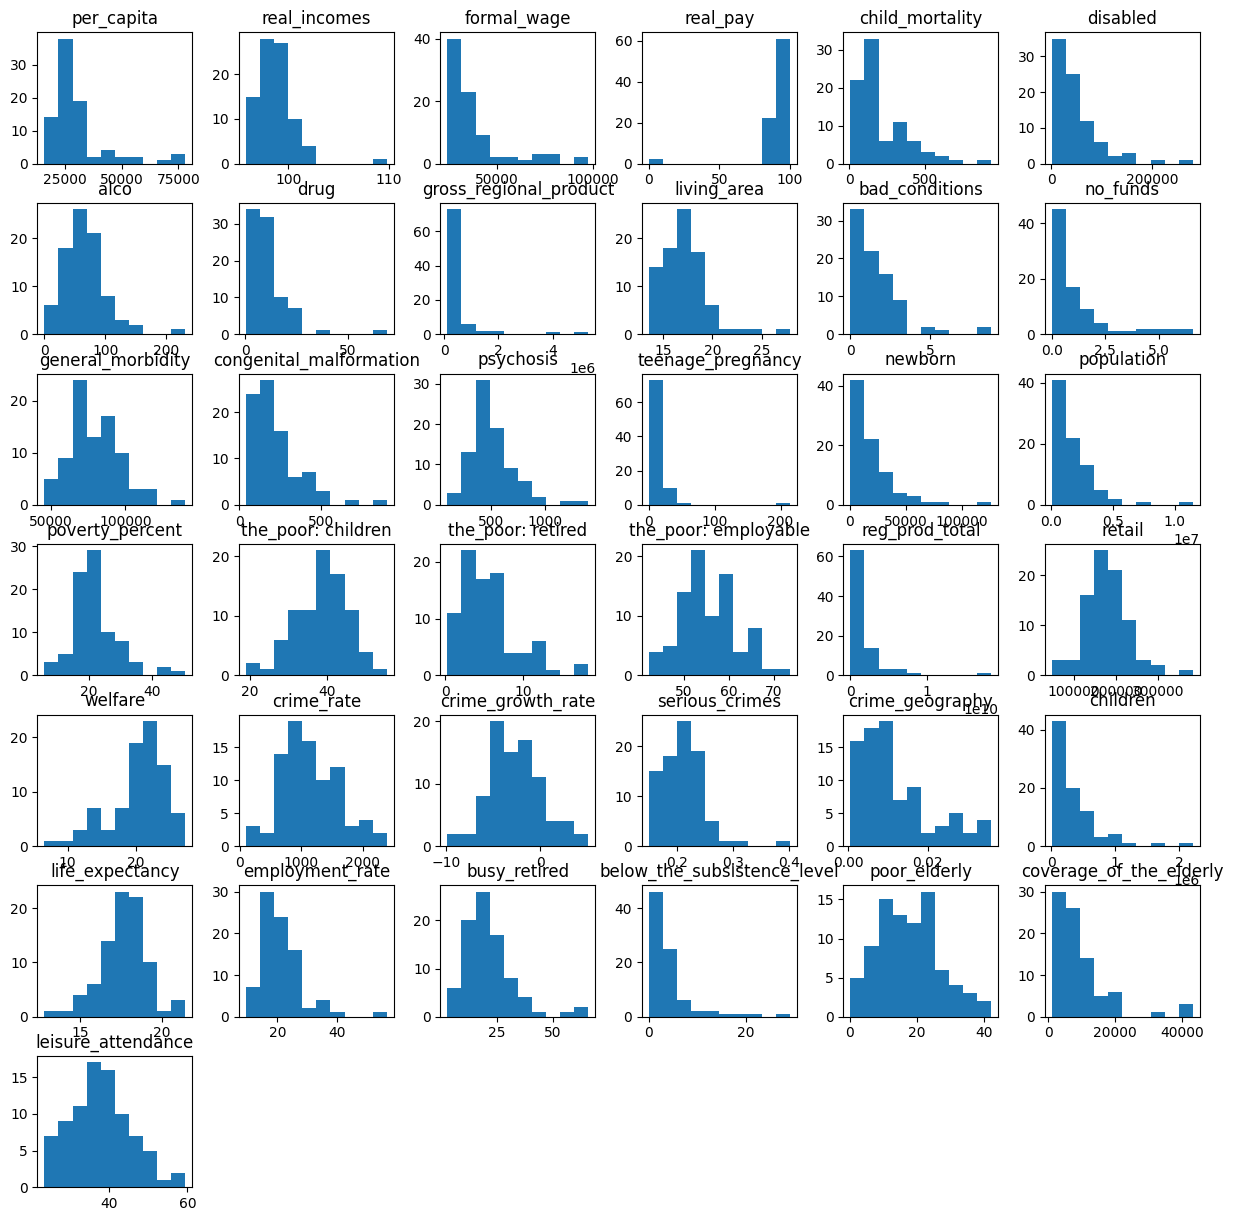

In [4]:
# Визуализируем распределение признаков
df.hist(figsize = (15,15), grid = False);
plt.show()

In [5]:
# тест Шапиро для проверки распределения числовых признаков нормальному закону 
# H0: распределение признака соответствует нормальному закону Гаусса-Лапласа
# H1: распределение признака значимо отличается от нормального закона Гаусса-Лапласа

# задаём уровень значимости
alpha = 0.05
for col in df.columns:
    _, p = shapiro(df[col])
    print(f'{col}:   p-value = {p:.3f}')
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


per_capita:   p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
real_incomes:   p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
formal_wage:   p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
real_pay:   p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
child_mortality:   p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
disabled:   p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
alco:   p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
drug:   p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
gross_regional_product:   p-value = 0.000
p-значение меньше, чем заданный уровень значим

#### Промежуточные выводы:
На основании анализа гистограмм изучаемых признаков и теста Шапиро было установлено, с вероятностью 0,95 распределение следующих признаков соотвествуют нормальному закону: 
* средний процент детей среди малообеспеченного населения (*the_poor: children*),
* средний процент людей трудоспособного возраста среди малообеспеченного населения (*the_poor: employable*),
* средний уровень преступлений (*crime_rate*),
* средний темп прироста преступностей (*crime_growth_rate*),
* ожидаемая продолжительность жизни в 55 лет без инвалидности (*life_expectancy*),
* бедные по самооценке пожилые люди (*poor_elderly*),
* посещаемость пожилыми досуговых мероприятий (*leisure_attendance*).

Учитывая, что большинство признаков имеют распределение отличного от нормального закона, можно предположить о наличии нескольких групп признаков.
Следует указать, что несмотря на наличие экстремальных значений (потенциально выбросов) в некоторых признаках, нет необходимости в их исключении, поскольку имеющиеся численные оценки носят достаточно объективный характер и отбрасывать некоторые регионы бессмысленно с точки зрения достижения целей кластеризации.

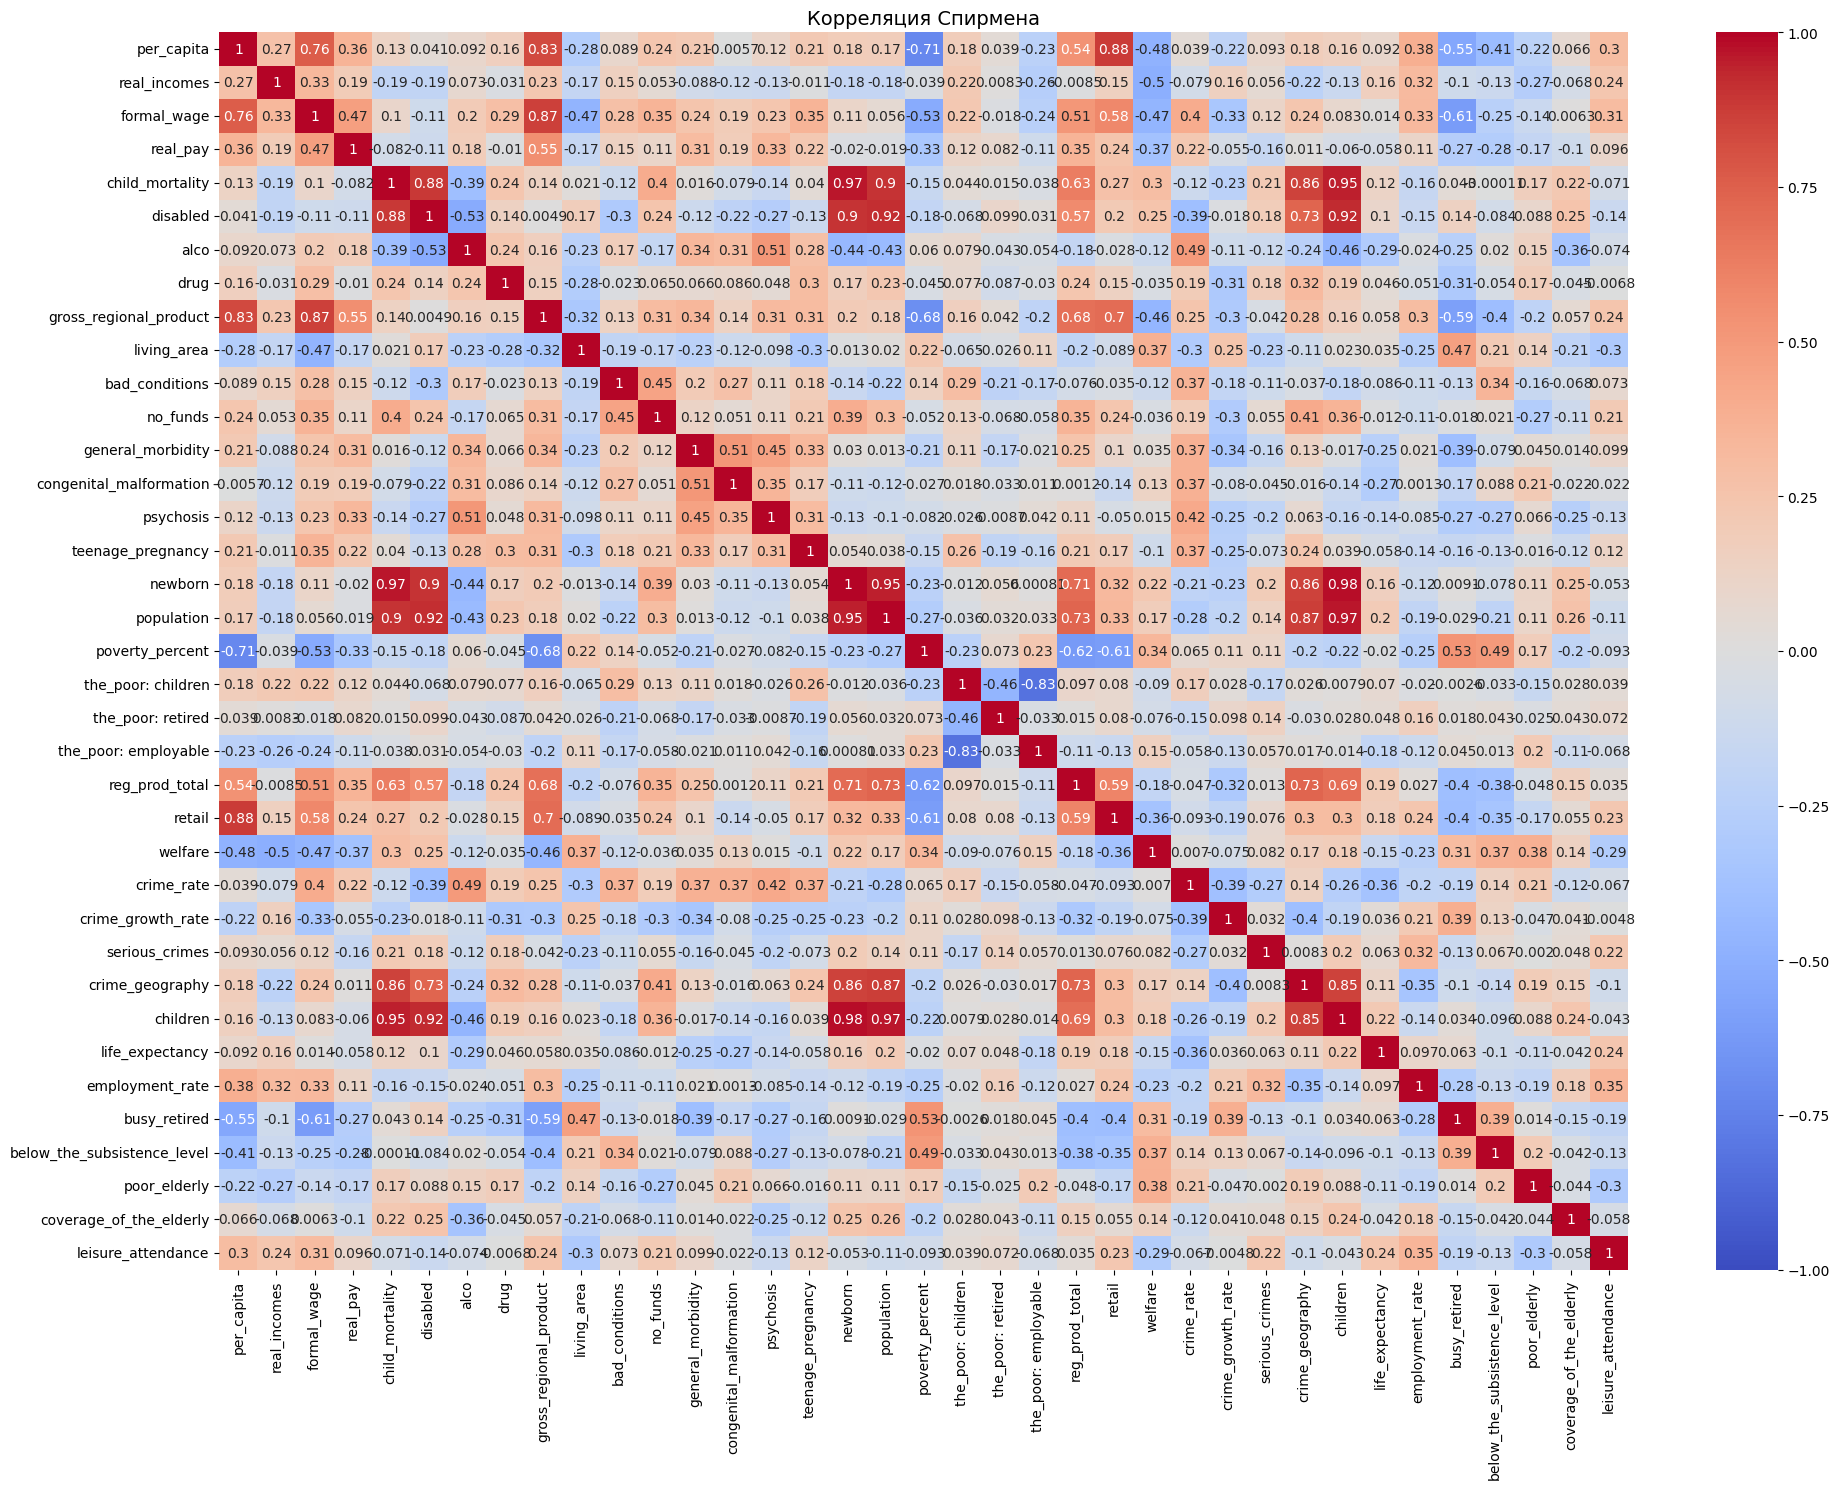

In [6]:
# Создаем тепловую карту, визуализирующую значения матрицы корреляции всех пар переменных
# поскольку распределения далеки от нормальных, рассмотрим ранговые критерии Спирмена (предполагает линейную зависимость 
# между признаками)
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df.corr(method='spearman'), 
            annot=True, cmap='coolwarm', vmin=-1, ax=ax)
ax.set_title('Корреляция Спирмена', fontsize=14)
plt.tight_layout();

#### Промежуточные выводы:
1) видно, что признаки средняя рождаемость на 100 тыс. населения (*newborn*) и население (*population*) имеют наиболее высокие коэффициенты корреляции с другими признаками. Видно, что высокая детская смертность приводит к высокой рождаемости (0,97), высокая инвалидность среди трудоспособного возраста также приводит к высокой рождаемости (0,90), а также наблюдается тесная связь рождаемости с численностью населения региона (0,95);
2) коэффициенты территориального распределения преступности (*сrime_geography*) имеют тесную линейную положительную связь со следующими признаками: детской смертностью (*child_mortality*) - 0,86, инвалидностью среди трудоспособного возраста (*disabled*) - 0,73, средней рождаемостью на 100 тыс. населения (*newborn*) - 0,86, населением (*population*) - 0,87, а также значениями региональных производств по всем видам деятельности на душу населения (*reg_prod_total*) - 0,73;
3) признак среднемесячная номинальная начисленная заработная плата на человека (*formal_wage*), являясь вспомогательным экономическим индикатором, имеет сильную положительную линейную связь (0,76) с денежным доходом на человека (*per_capita*);
4) признак денежный доход на человека (*per_capita*), имеет высокие прямые линейные корреляции с валовым региональным продуктом (*gross_regional_product*) - 0,83 и розничной торговлью на душу населения(*retail*) - 0,88, обратную связь со средним процентом населения за чертой бедности (*poverty_percent*);
5) признак среднее количество детей (*children*) сильно коррелирует с детской смертностью (*child_mortality*) - 0,95, инвалидностью среди трудоспособного возраста (*disabled*) - 0,72, средней рождаемостью на 100 тыс. населения (*newborn*) - 0,98, населением (*population*) - 0,97 и коэффициентом территориального распределения преступности (*сrime_geography*) - 0,85;
6) отдельные оставшиеся в датасете признаки имеют высокую мультиколлинеарность с другими признаками, потому далее спроектируем новые признаки с учетом имеющихся в датасете признаков.   

### 2.2. Проектирование новых признаков и их формализация

In [7]:
# средний процент детей среди всего населения
df['children_%'] = (df['children']*100/df['population']).round(2).astype(int) 
# число малоимущих
df['the_poor'] = (df['population'] * df['poverty_percent'] / 100).round(0).astype(int)
# число малоимущих среди малообеспеченного населения
df['poor_children'] = (df['the_poor'] * df['the_poor: children'] / 100).round(0).astype(int)
# число людей трудоспособного возраста среди малообеспеченного населения
df['poor_employable'] = (df['the_poor'] * df['the_poor: employable'] / 100).round(0).astype(int)   
# число пенсионеров среди малообеспеченного населения
df['poor_retired'] = (df['the_poor'] * df['the_poor: retired'] / 100).round(0).astype(int)

In [8]:
# удаление признаков
df.drop(columns=['the_poor', 'the_poor: children', 'poverty_percent', 
                'the_poor: employable', 'the_poor: retired', 'newborn', 'children'], 
                axis=1, inplace=True)

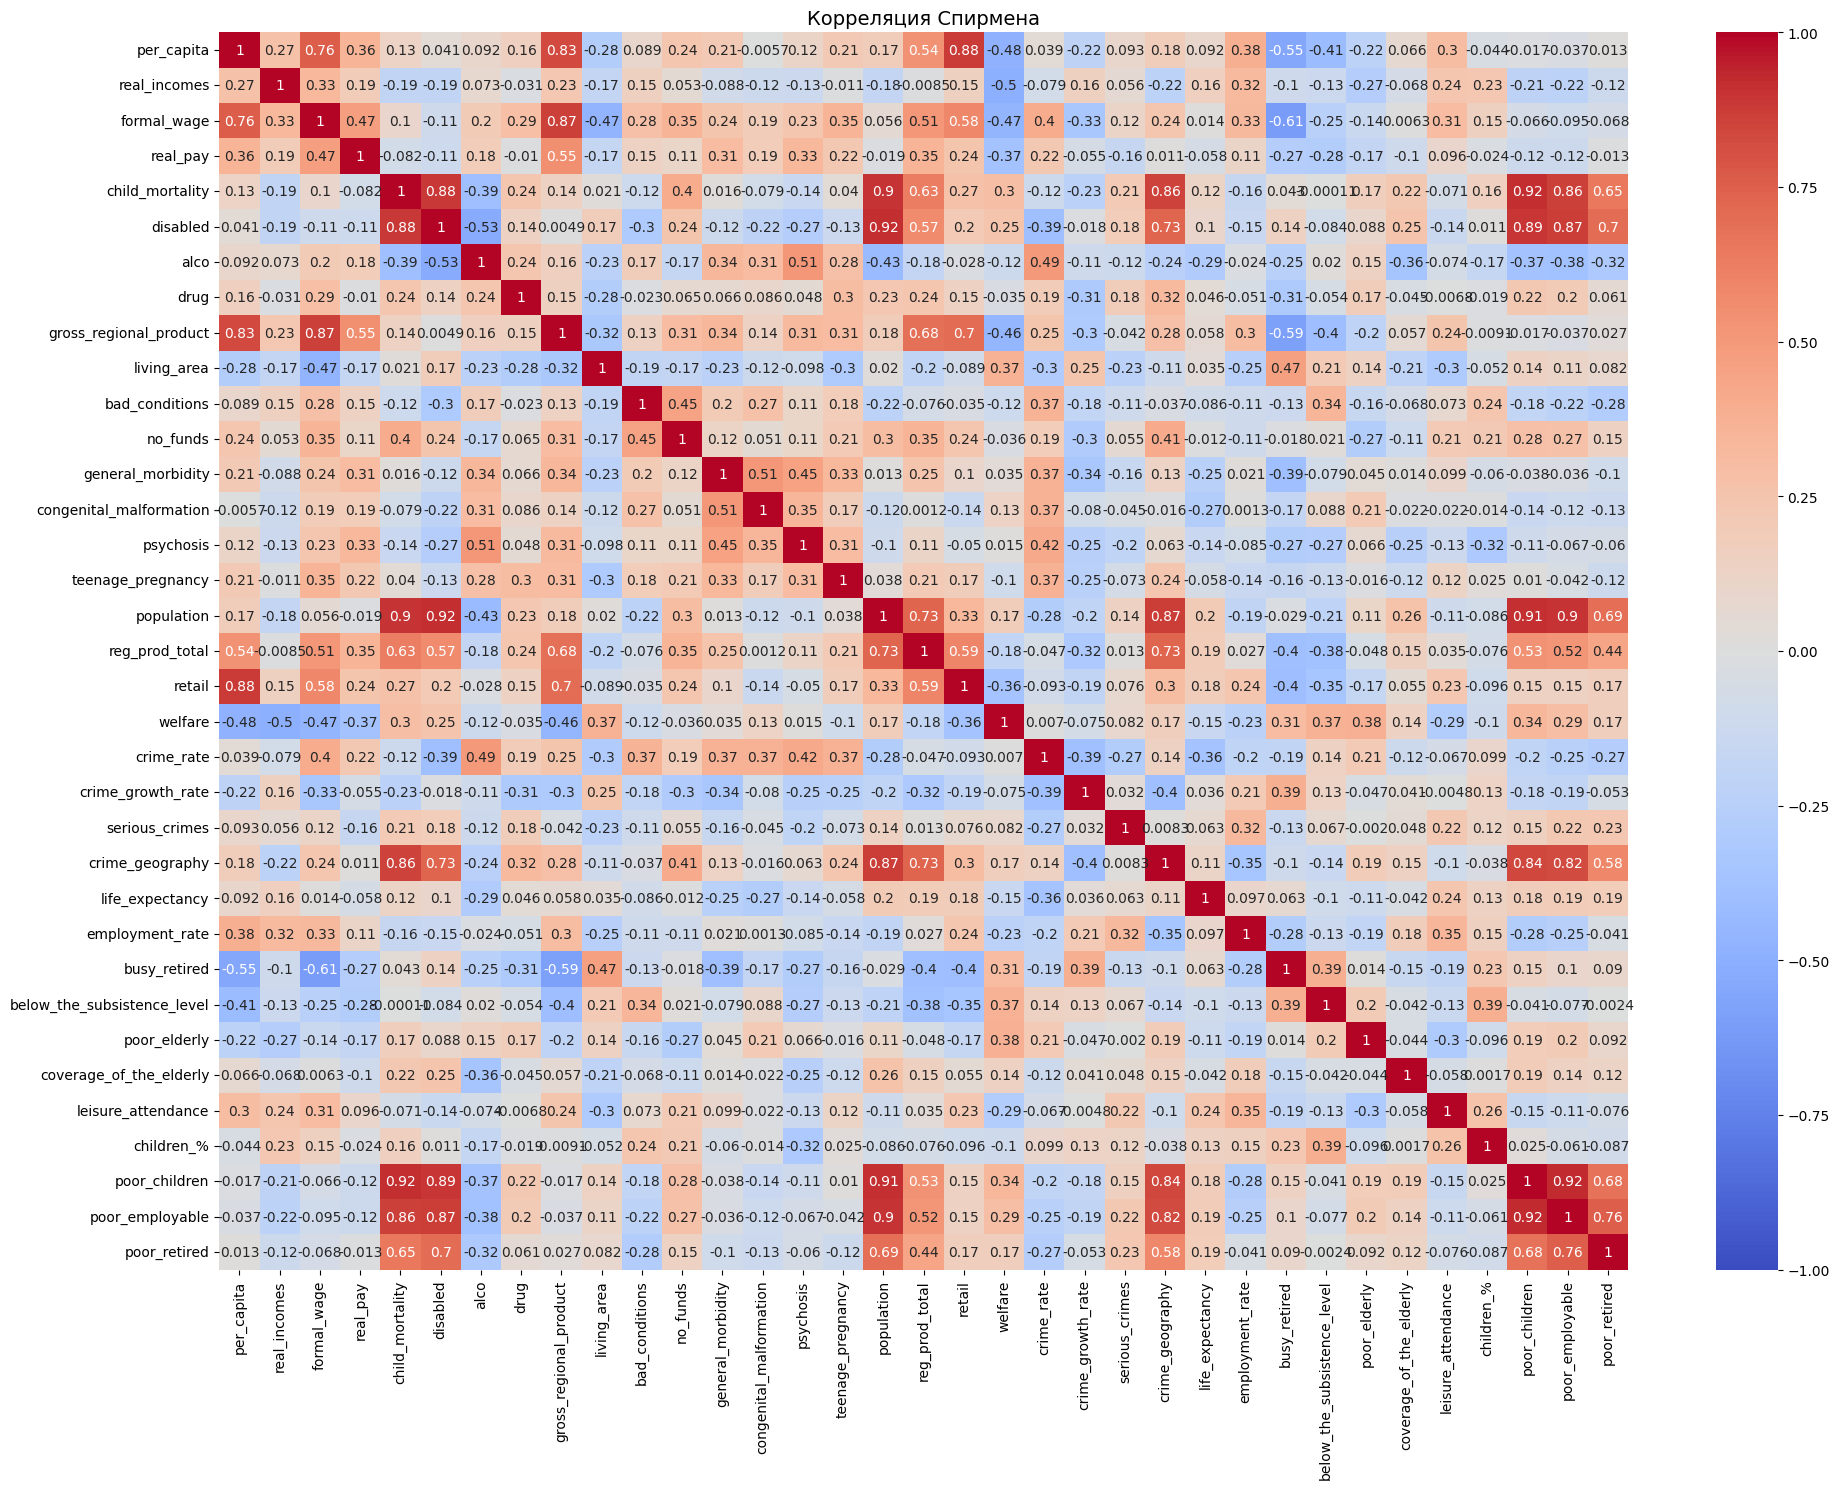

In [9]:
# Создаем новую тепловую карту
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df.corr(method='spearman'), 
            annot=True, cmap='coolwarm', vmin=-1, ax=ax)
ax.set_title('Корреляция Спирмена', fontsize=14)
plt.tight_layout();

### 2.3. Рейтинги регионов по отдельным показателям

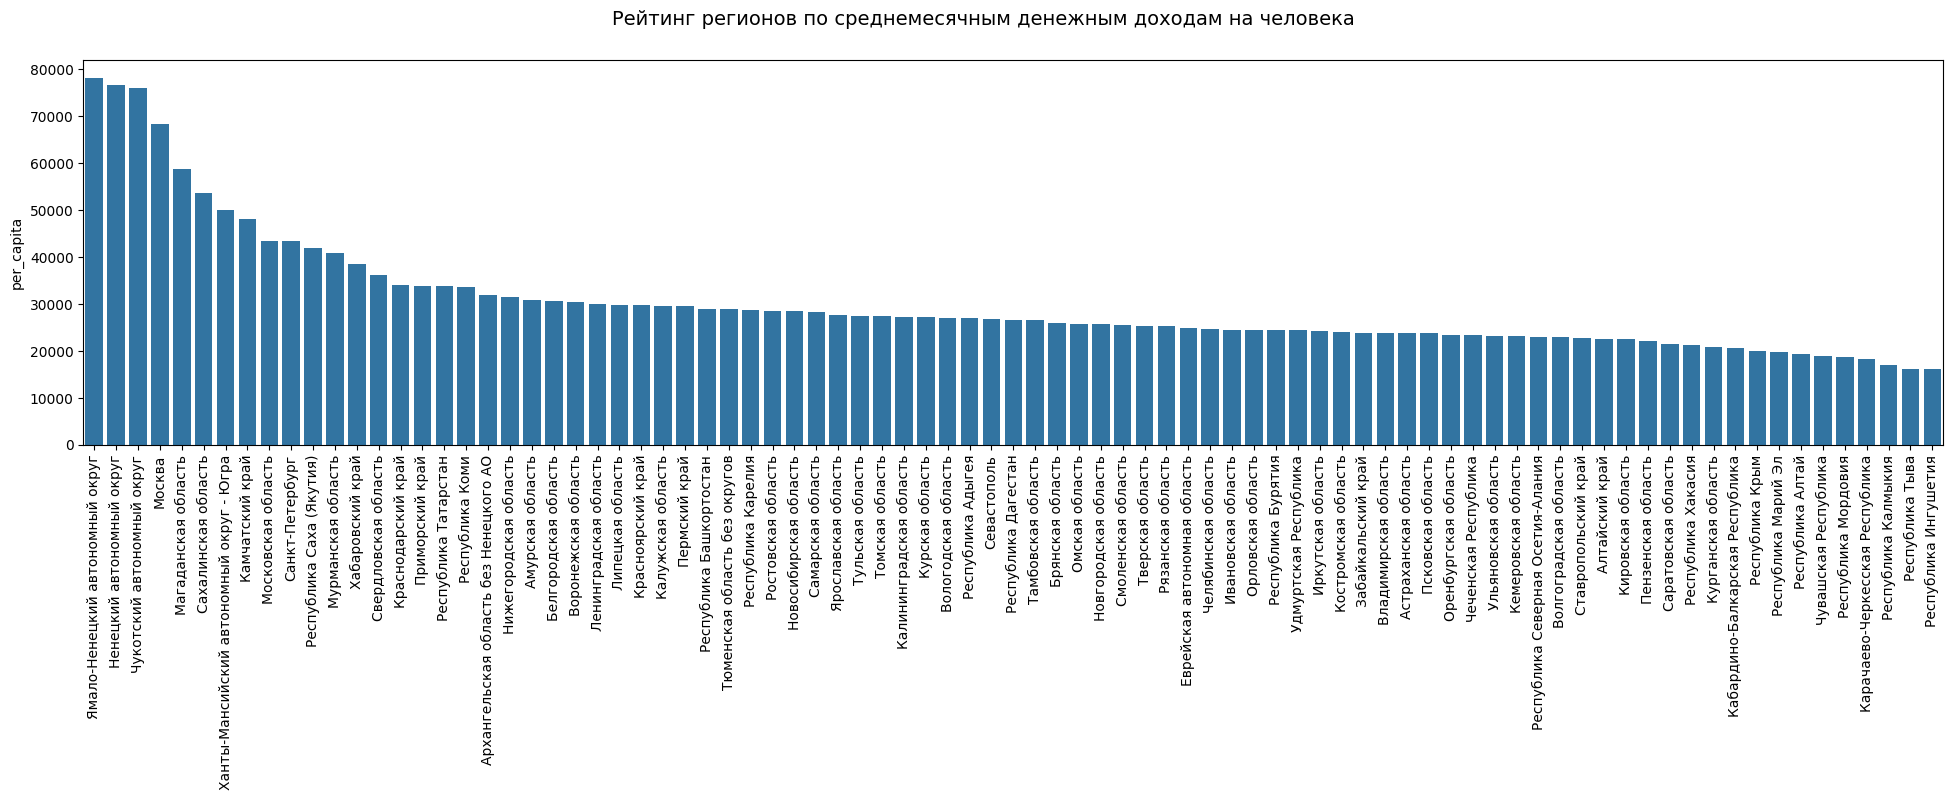

In [10]:
df.sort_values(by='per_capita', ascending=False, inplace=True)
fig = plt.figure(figsize=(24,5))
sns.barplot(data=df, x=df.index, y='per_capita')
fig.suptitle(
    'Рейтинг регионов по среднемесячным денежным доходам на человека',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

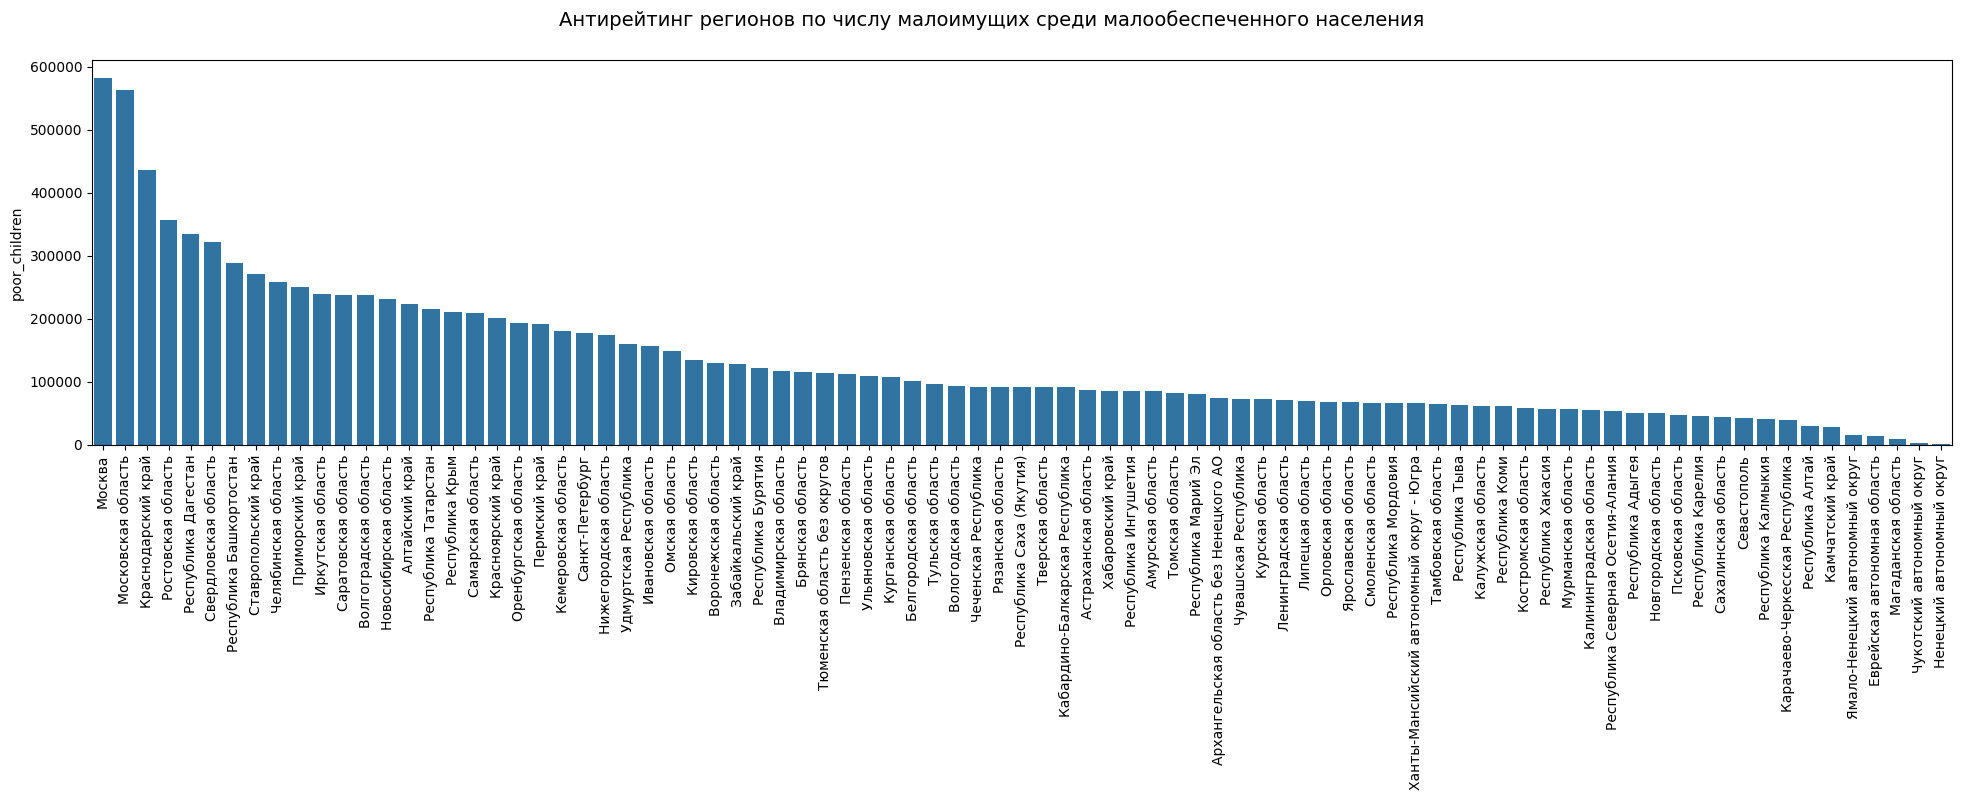

In [11]:
df.sort_values(by='poor_children', ascending=False, inplace=True)
fig = plt.figure(figsize=(24,5))
sns.barplot(data=df, x=df.index, y='poor_children')
fig.suptitle(
    'Антирейтинг регионов по числу малоимущих среди малообеспеченного населения',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

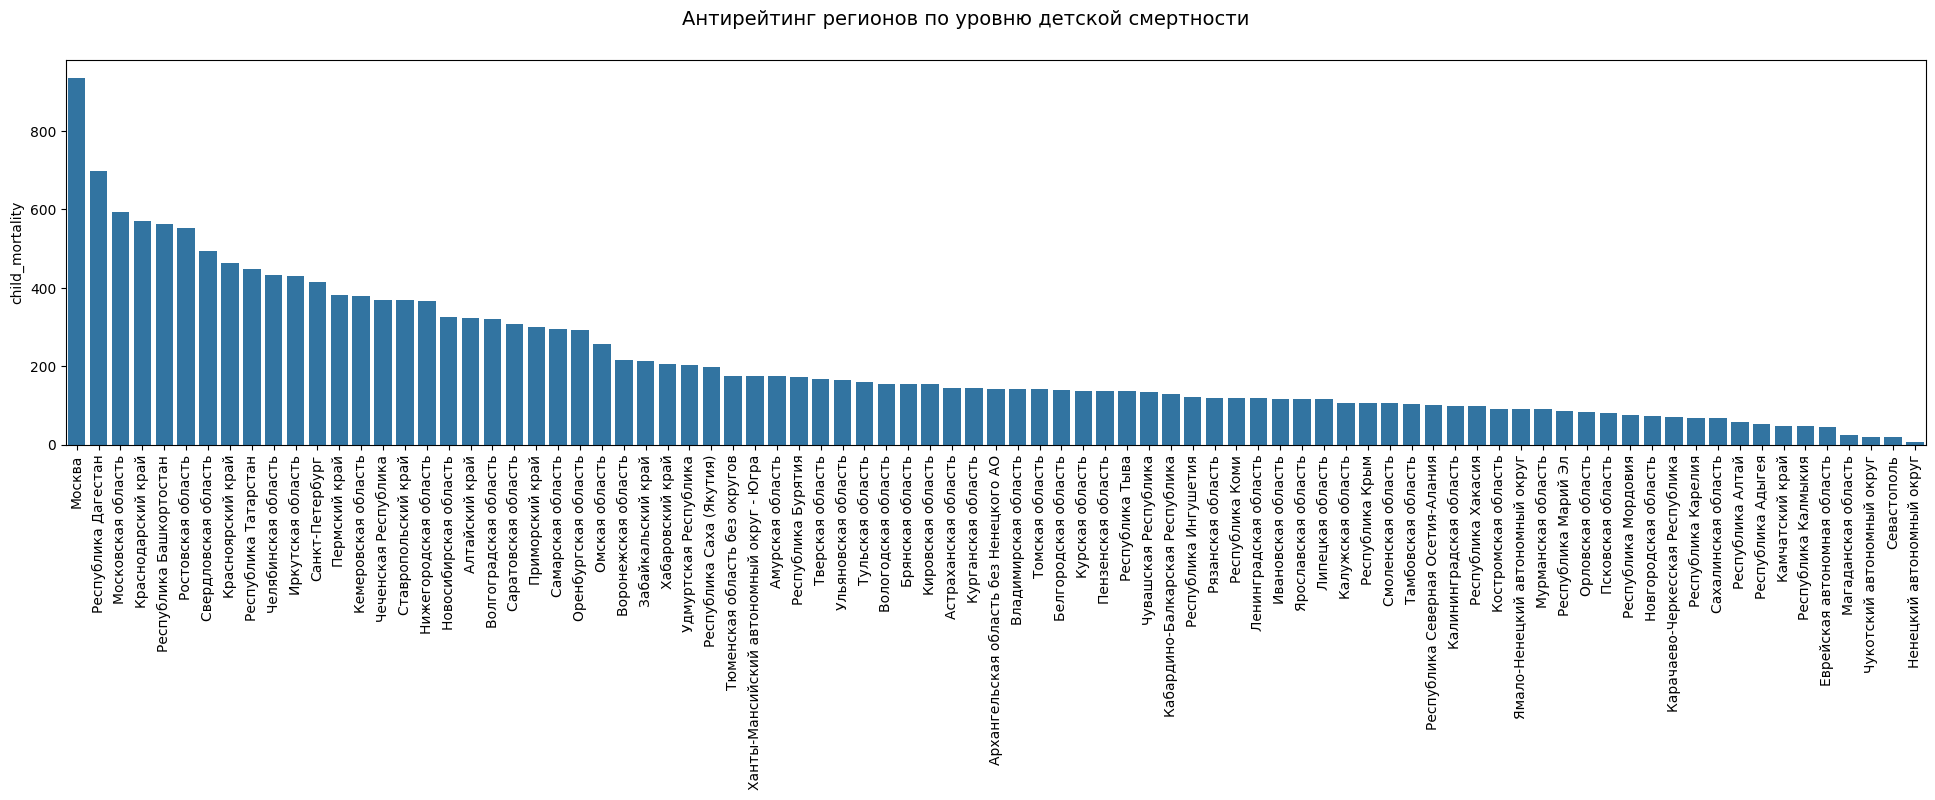

In [12]:
df.sort_values(by='child_mortality', ascending=False, inplace=True)
fig = plt.figure(figsize=(24,5))
sns.barplot(data=df, x=df.index, y='child_mortality')
fig.suptitle(
    'Антирейтинг регионов по уровню детской смертности',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

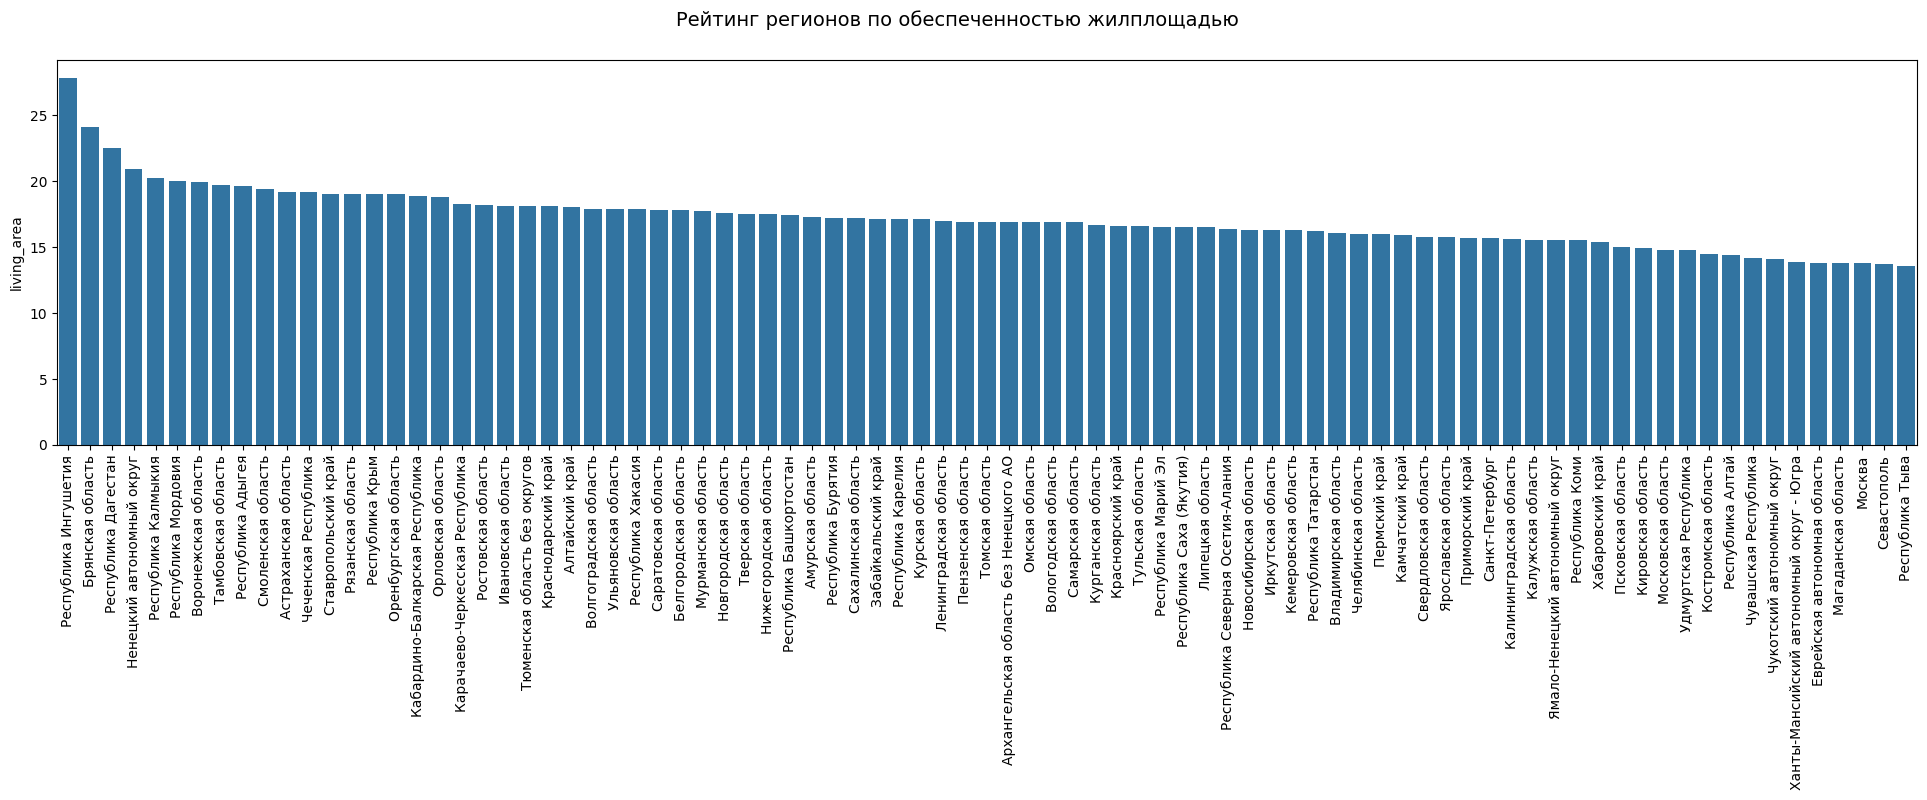

In [13]:
df.sort_values(by='living_area', ascending=False, inplace=True)
fig = plt.figure(figsize=(24,5))
sns.barplot(data=df, x=df.index, y='living_area')
fig.suptitle(
    'Рейтинг регионов по обеспеченностью жилплощадью',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

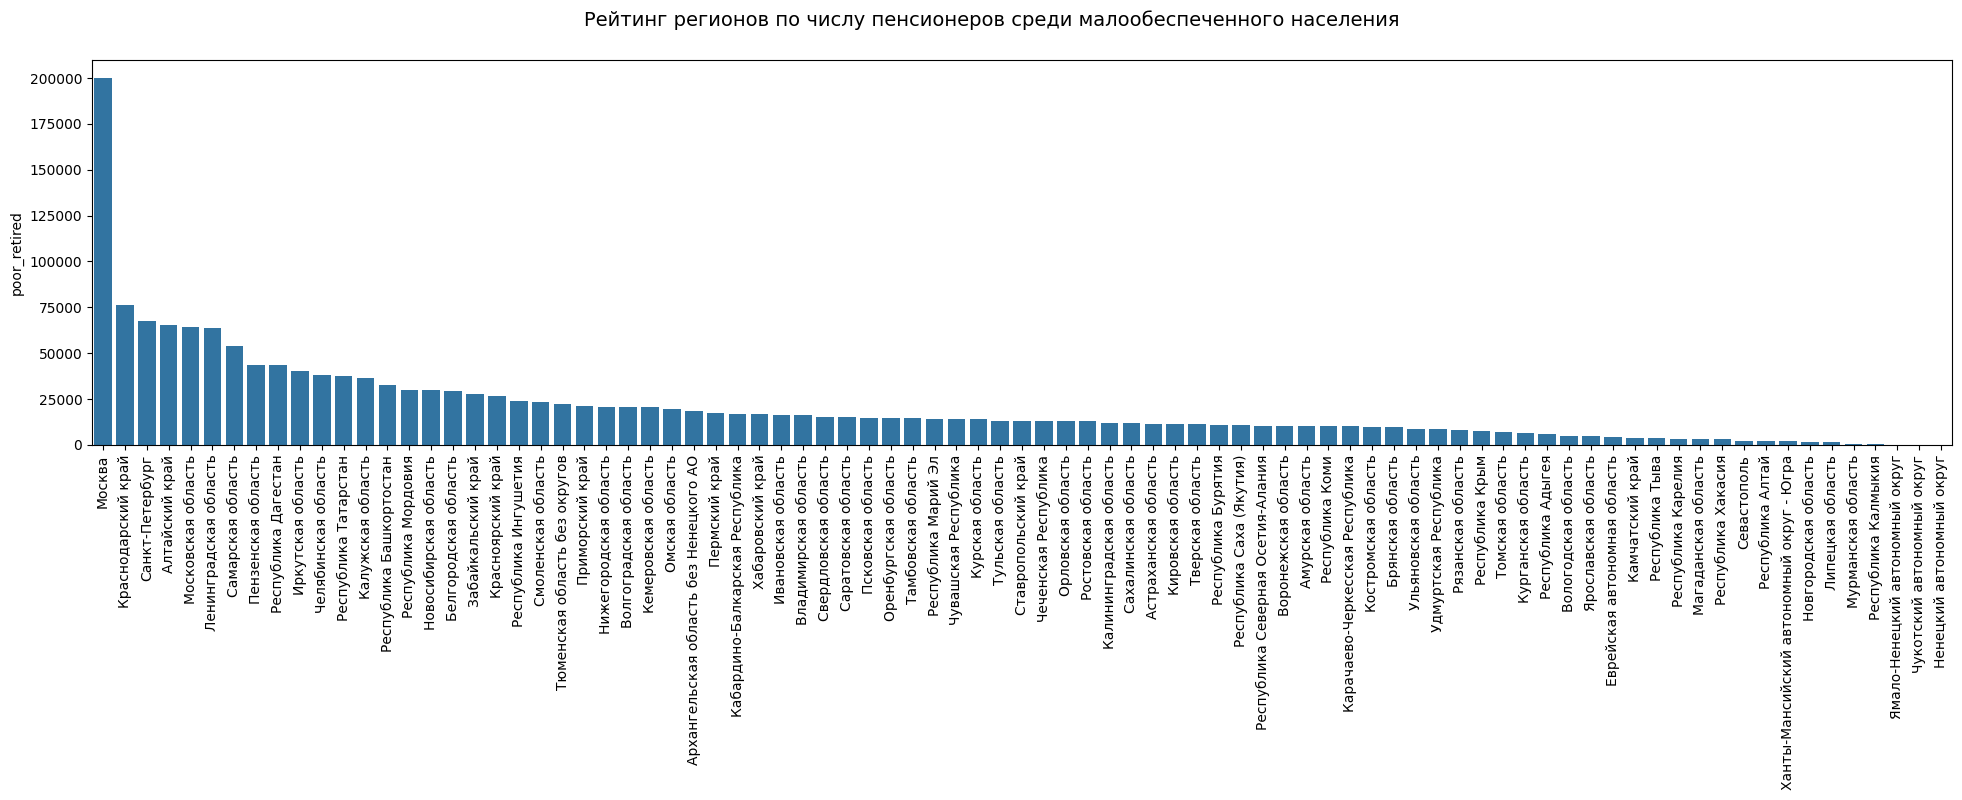

In [14]:
df.sort_values(by='poor_retired', ascending=False, inplace=True)
fig = plt.figure(figsize=(24,5))
sns.barplot(data=df, x=df.index, y='poor_retired')
fig.suptitle(
    'Рейтинг регионов по числу пенсионеров среди малообеспеченного населения',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

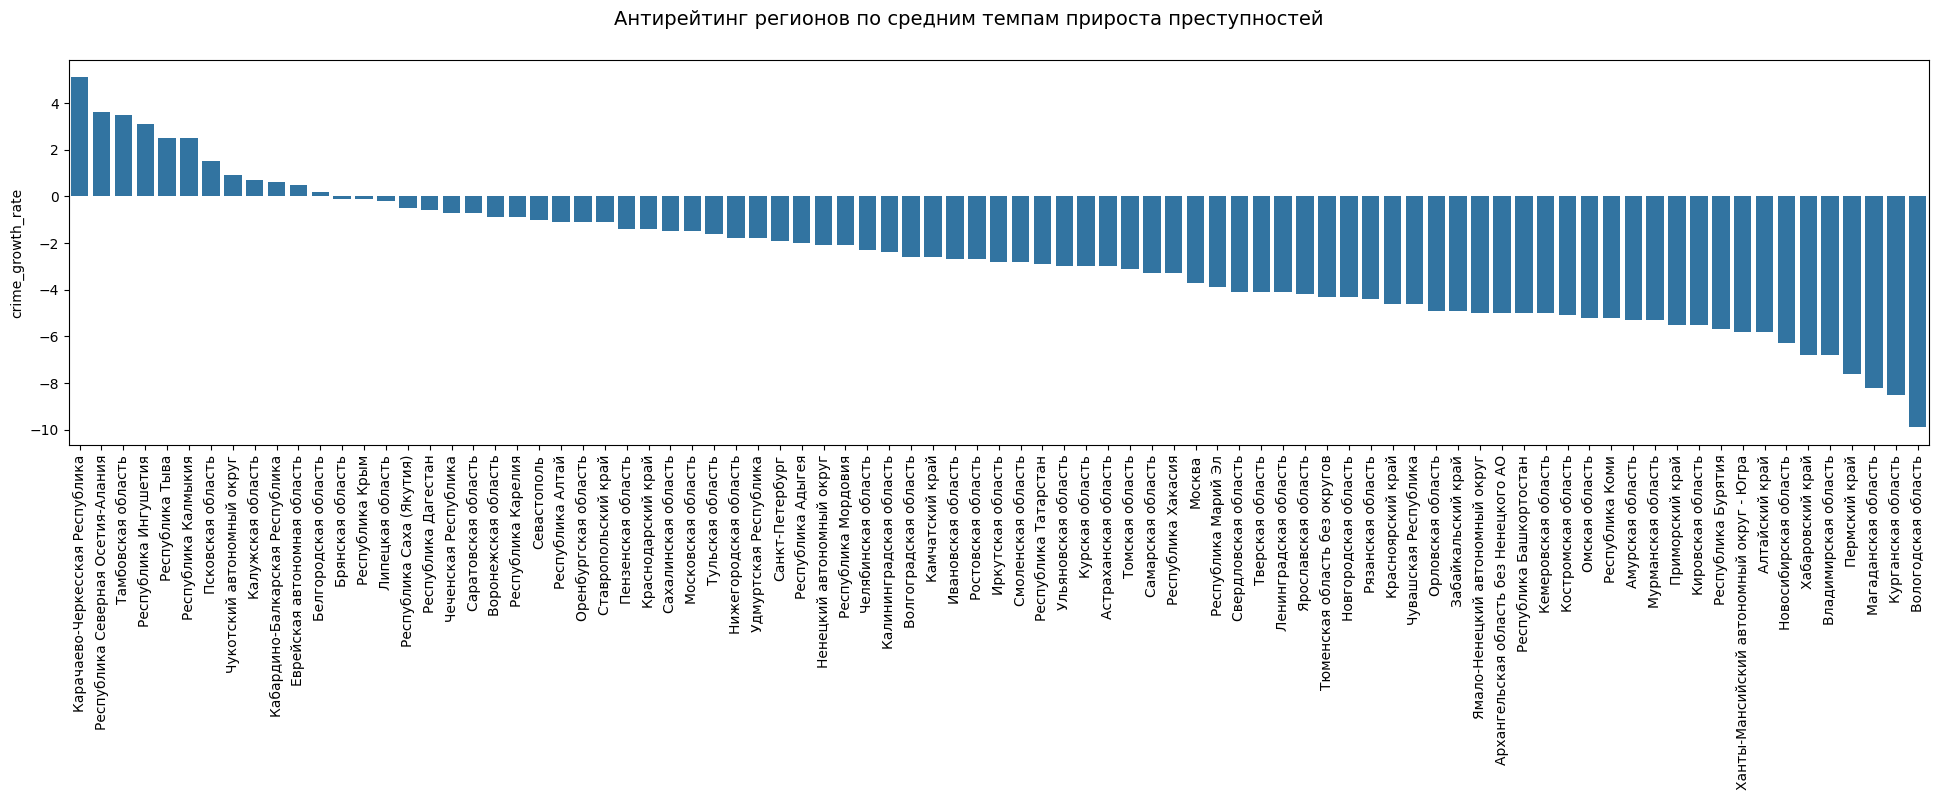

In [15]:
df = df.sort_values(by='crime_growth_rate', ascending=False)
fig = plt.figure(figsize=(24,5))
sns.barplot(data=df, x=df.index, y='crime_growth_rate')
fig.suptitle(
    'Антирейтинг регионов по средним темпам прироста преступностей',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

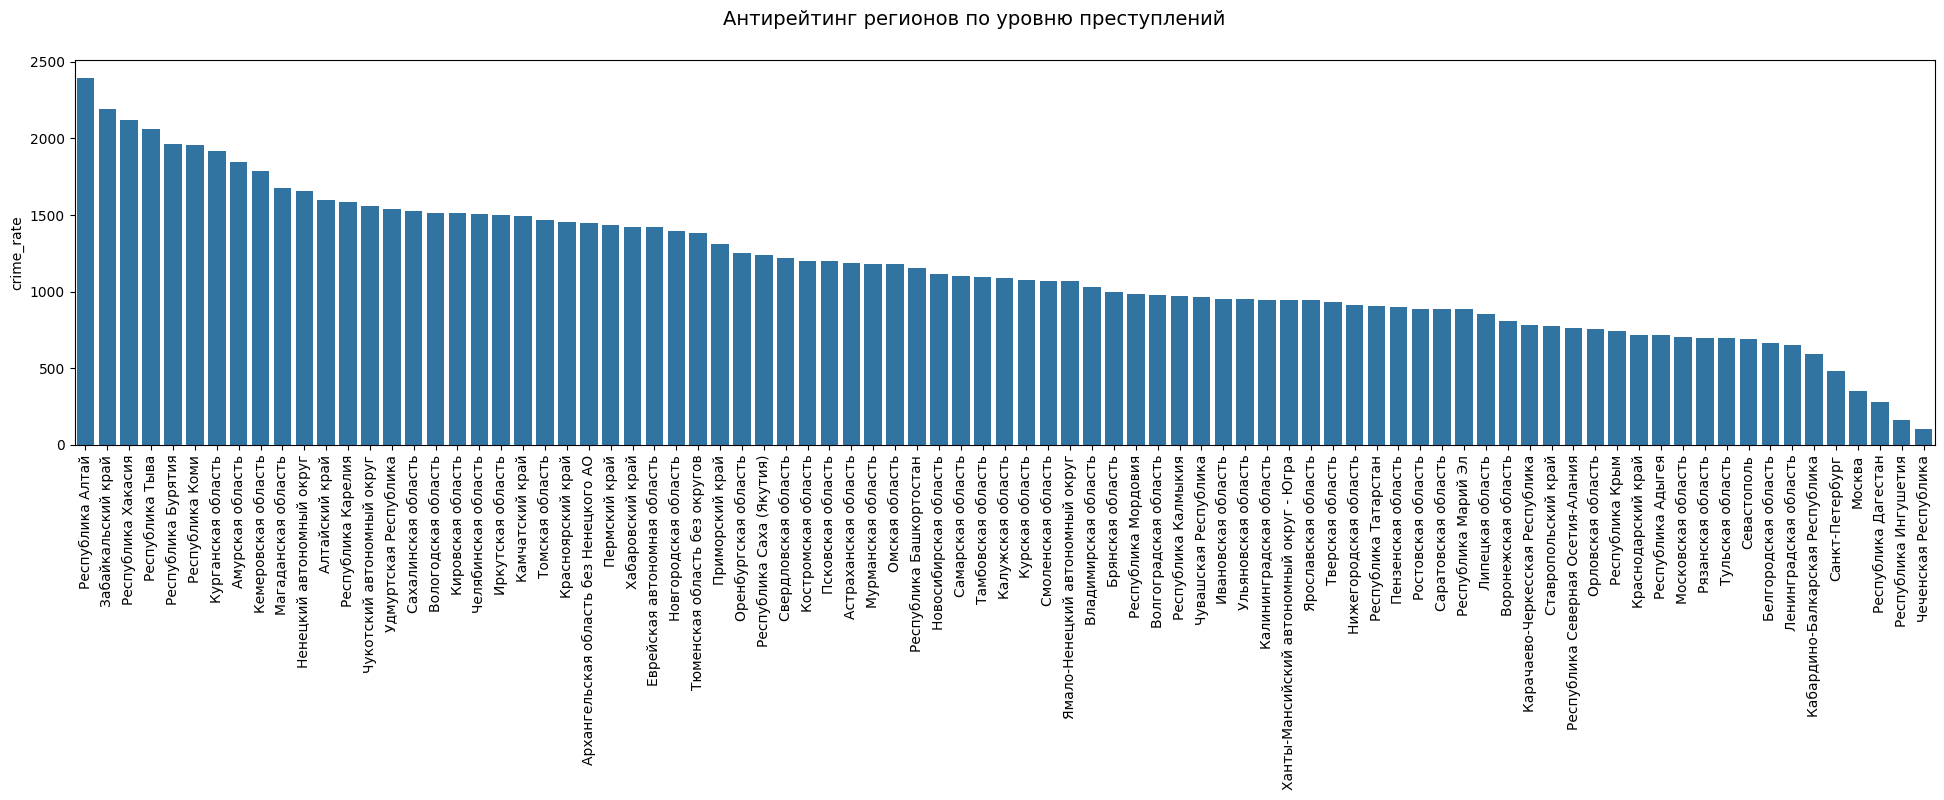

In [16]:
df = df.sort_values(by='crime_rate', ascending=False)
fig = plt.figure(figsize=(24,5))
sns.barplot(data=df, x=df.index, y='crime_rate')
fig.suptitle(
    'Антирейтинг регионов по уровню преступлений',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

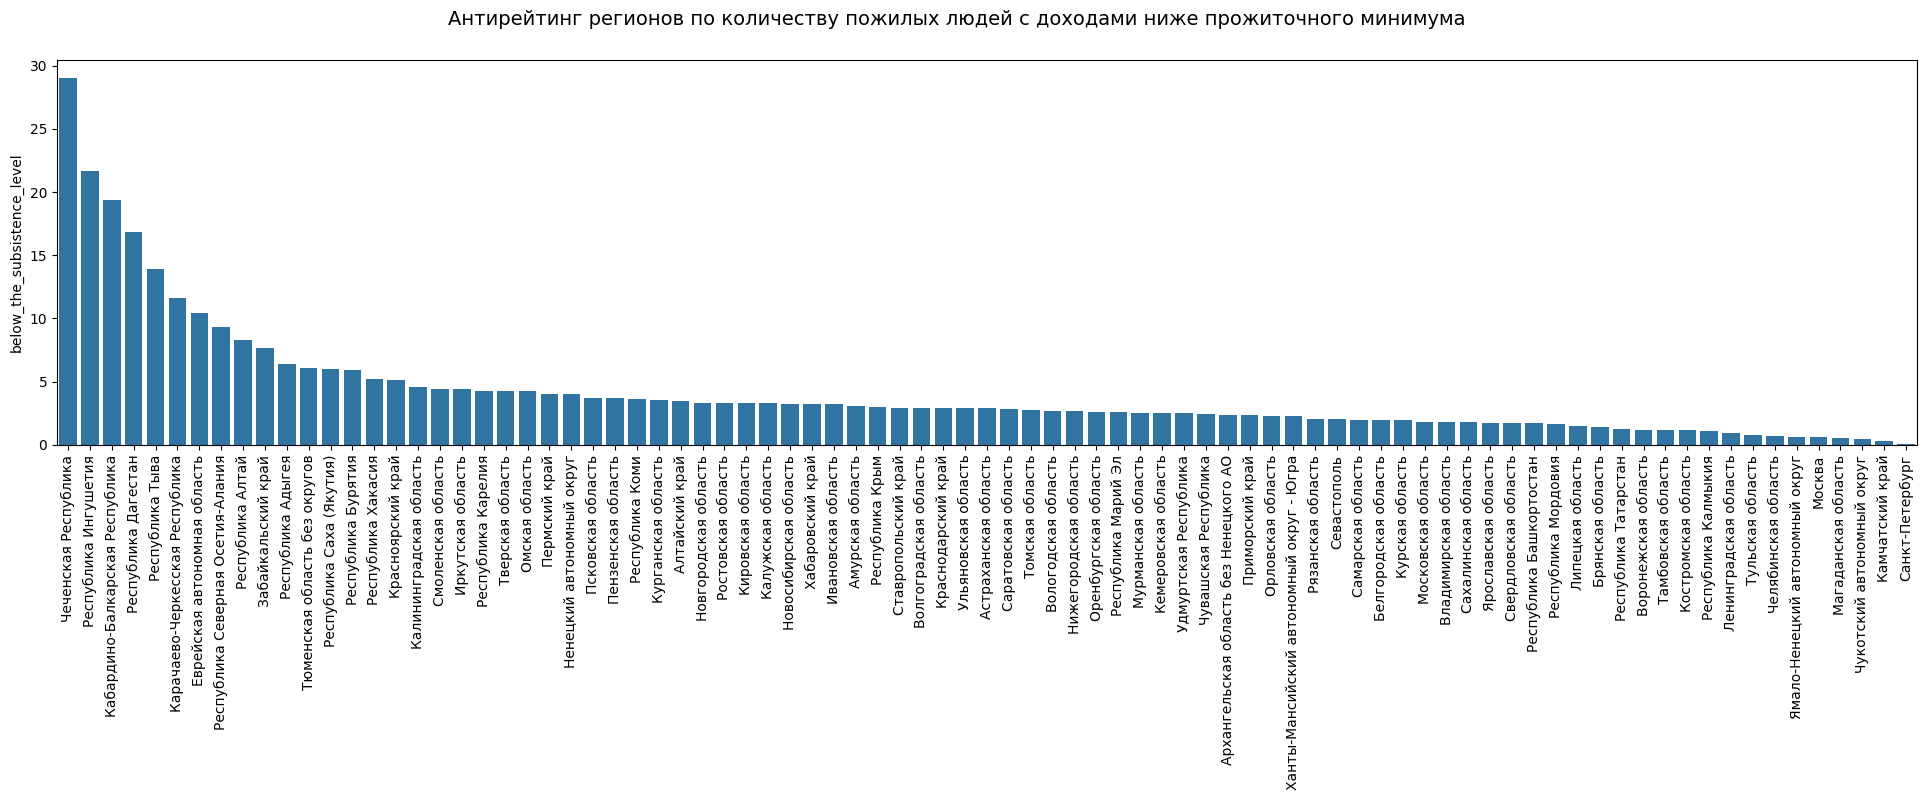

In [17]:
df = df.sort_values(by='below_the_subsistence_level', ascending=False)
fig = plt.figure(figsize=(24,5))
sns.barplot(data=df, x=df.index, y='below_the_subsistence_level')
fig.suptitle(
    'Антирейтинг регионов по количеству пожилых людей с доходами ниже прожиточного минимума',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

#### Промежуточные выводы:
1) Наилучшие рейтинги регионов по доходам на душу населения отмечается в Ямало-ненецком, Ненецком и Чукотском автономных округах, а также в г. Москве, худшие рейтинги - у республик Калмыкии, Тыва и Ингушетии, которые также являются худшими по уровню бедности (поскольку наличие обратной линейной связи между признаками);
2) Среди лидеров по уровню детской смертности - Москва, Московская область и республика Дагестан, по числу малоимущих среди малообеспеченного населения - Москва, Московская область, Краснодарский край и Санкт-Петербург, по числу пенсионеров среди малообеспеченного населения - Краснодарский край и Санкт-Петербург, а также г. Москва, которая также является одной из худших по обеспеченностью жилплощадью на человека. Антирейтинг регионов по количеству пожилых людей с доходами ниже прожиточного минимума возглавили Чеченская, Кабардино-Балкарская республика и Ингушетия;
3) Антирейтинг регионов по средним темпам прироста преступностей возглавили Карачаево-Черкесская республика, республика Северная Осетия-Алания, а также Тамбовская область, в то время, как республики Алтай и Хакасии, а также Забайкальский край - худшие по уровню преступности. 

### 2.4. Нормализация данных и кластеризация

In [18]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(df)

##### 2.4.1. Иерархический алгоритм кластеризации на основе метода Уорда

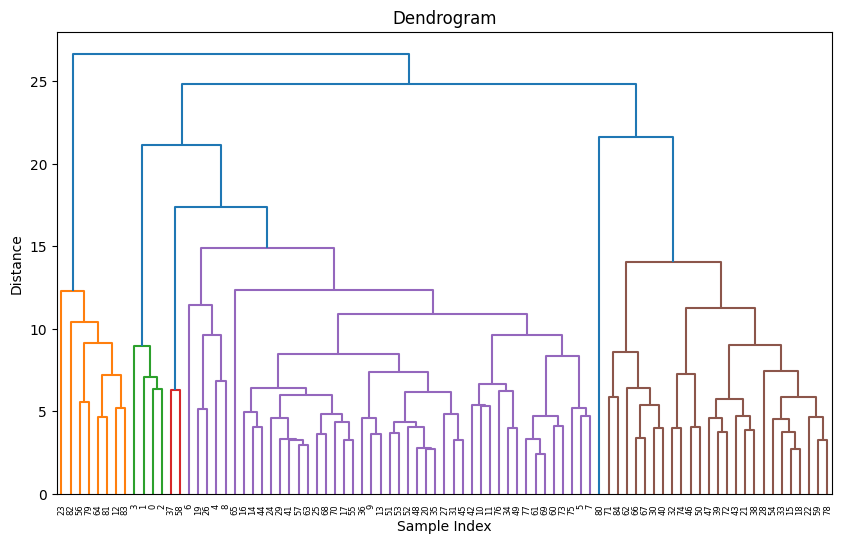

In [19]:
linkage_matrix = linkage(X, method='ward', metric='euclidean')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, color_threshold=15)
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.title("Dendrogram")
plt.show()

На основании эвклидового расстояния между признаками ($Distance$ = 20) можно определить 5 кластеров, однако такое разделение весь разнородно по числу регионов, входящих в кластер. Например, в первом кластере - 8 субъектов РФ, во втором - 4, в третьем - 47 регионов, в четвертом - 1, пятый кластер формирует 25 регионов. При уменьшении расстояния до ($Distance$ = 15) формируется большее число кластеров (6 шт.), среди которых 3 являются малочисленными (не более 5 регионов). Понять, какое оптимальное количество кластеров можно применить, будем использовать методы для понимажения размерности PCA и TSNE.

##### 2.4.2. Поиск оптимального числа кластеров

In [20]:
models = []  # список моделей
clusters = []  # количество кластеров для каждой модели
silhouette = [] # список коэффициентов силуэта
calinski_harabasz = [] # список коэффициентов Калински-Харабаса
davies_bouldin = [] # список коэффициентов Дэвиса-Болдина
# не знаем истинную кластеризацию, сравним разные модели с базовой
rand = [] # список индексов Рэнда (мера сходства между двумя кластеризациями данных) 
clusters_sizes = [] # размеры кластеров

In [21]:
def add_list_metrics(data, labels, model, num_cluster, cluster_size, baseline_labels):    
    # рассчитываем коэффициенты
    silhouette_coef = metrics.silhouette_score(data, labels)  
    calinski_harabasz_coef = metrics.calinski_harabasz_score(data, labels)  
    davies_bouldin_coef = metrics.davies_bouldin_score(data, labels)
    index_rand = metrics.adjusted_rand_score(baseline_labels, labels)
    
    # добавляем значения в списки
    silhouette.append(silhouette_coef)
    calinski_harabasz.append(calinski_harabasz_coef)
    davies_bouldin.append(davies_bouldin_coef)
    models.append(model)
    rand.append(index_rand)
    clusters.append(num_cluster)
    clusters_sizes.append(cluster_size)
    
    # выводим значения коэффициентов
    print('Silhouette: {:.3f}'.format(metrics.silhouette_score(df, labels)))
    print('Calinski-Harabatz: {:.3f}'.format(metrics.calinski_harabasz_score(df, labels)))
    print('Davis-Bouldin: {:.3f}'.format(metrics.davies_bouldin_score(df, labels)))
    print('Индекс Рэнда (сравнение с базовой моделью): %.3f' % index_rand)
    print('Размеры кластеров: ', cluster_size)

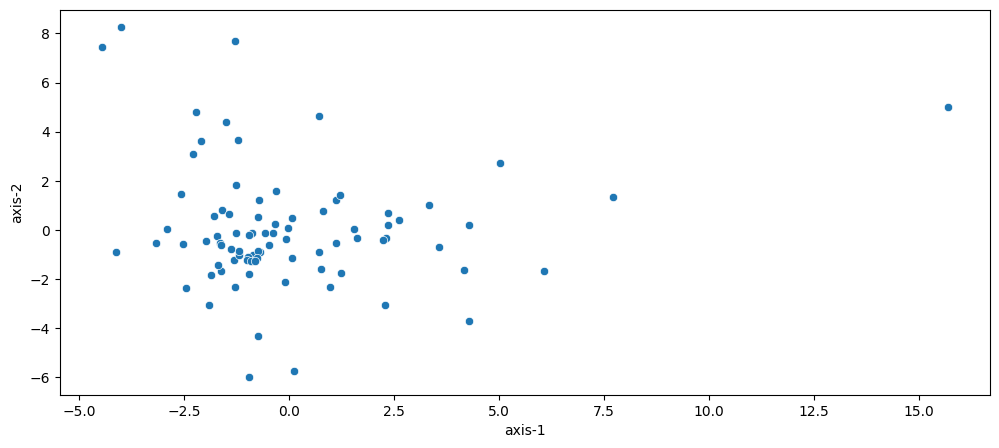

In [22]:
# применяем PCA для понижения размерности
X_pca = PCA(n_components=2, random_state=42)
pipe = Pipeline(steps=[('scaler', scaler), ('pca', X_pca)])
X = pipe.fit_transform(df)
X = pd.DataFrame(X, columns=['axis-1', 'axis-2'])

fig = plt.figure(figsize=(12, 5))
sns.scatterplot(data=X, x='axis-1', y='axis-2');

По графику сложно визуально оценить число кластеров

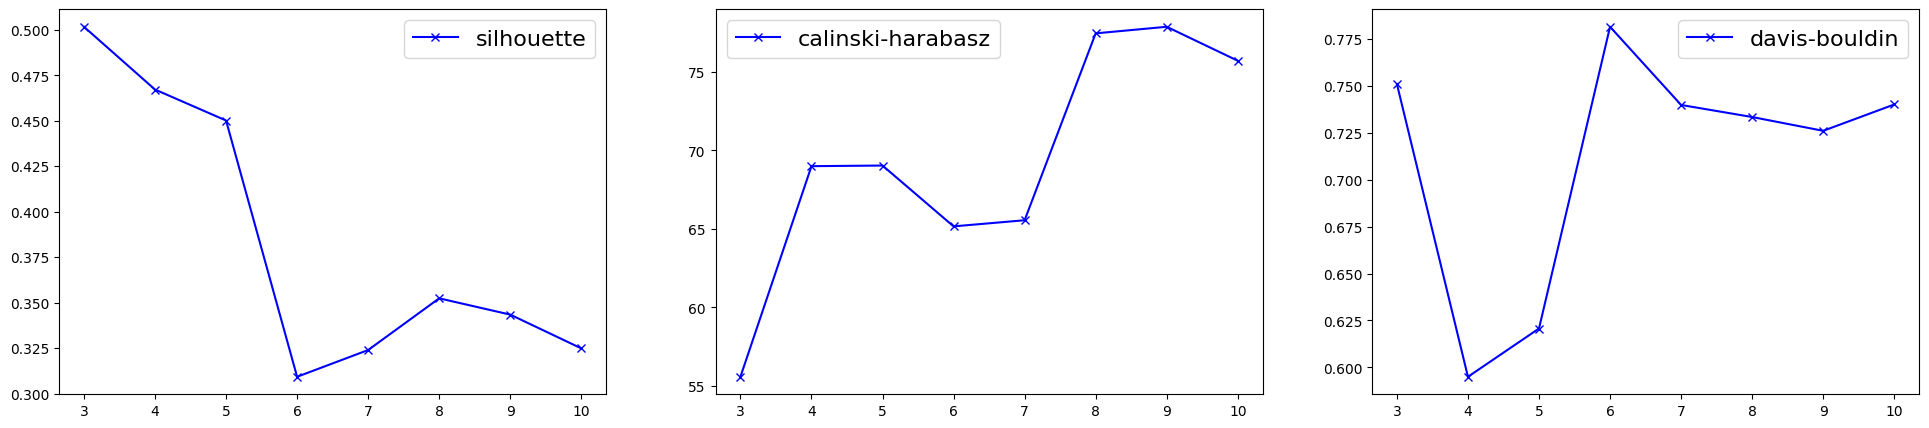

In [23]:
#узнаем оптимальное количество кластеров для метода KMeans
def plot_metrics(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    silhouette_element = metrics.silhouette_score(X, k_means.labels_, metric='euclidean') 
    calinski_harabasz_element = metrics.calinski_harabasz_score(X, k_means.labels_)  
    davis_bouldin_element = metrics.davies_bouldin_score(X, k_means.labels_) 
    
    return silhouette_element, calinski_harabasz_element, davis_bouldin_element

silhouettes_list = []
calinski_harabasz_list = []
davis_bouldin_list = []
#перебираем количество от 3 до 10 включительно
for i in range(3, 11):
    silhouette_element, calinski_harabasz_element, davis_bouldin_element = plot_metrics(i, X)
    silhouettes_list.append(silhouette_element)
    calinski_harabasz_list.append(calinski_harabasz_element)
    davis_bouldin_list.append(davis_bouldin_element)
    
# строим графики для выбранных метрик для выбора количества кластеров   
fig, ax = plt.subplots(1, 3, figsize=(24,5))
    
ax[0].plot(range(3, 11), silhouettes_list, 'xb-', label='silhouette')
ax[1].plot(range(3, 11), calinski_harabasz_list, 'xb-', label='calinski-harabasz')
ax[2].plot(range(3, 11), davis_bouldin_list, 'xb-', label='davis-bouldin')
ax[0].legend(prop={'size': 16})
ax[1].legend(prop={'size': 16})
ax[2].legend(prop={'size': 16})

Разделение кластеров нечеткое (коэффициент силуэта равен 0,5, наибольшее значение при минимальном количестве кластеров равно $n = 3$). Индекс Сalinski-Harabasz дает число кластеров $n = 9$, а Davis_Bouldin - $n = 4$ кластера. В качестве графического представления строим базовую модель по методу KMeans, возьмем число кластеров $n = 4$. Выводим значения метрик качества кластеризации.

<Axes: xlabel='axis-1', ylabel='axis-2'>

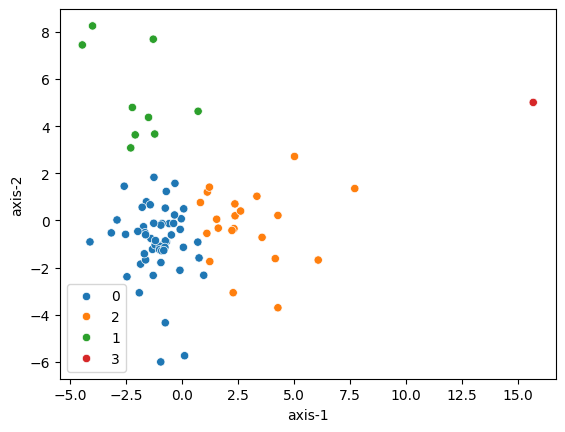

In [24]:
# оптимальное количество кластеров=4, строим базовую модель
model_KMeans = KMeans(n_clusters=4, random_state=42)
model_KMeans.fit(X)

#рисуем график
sns.scatterplot(data=X, x='axis-1', y='axis-2', hue=model_KMeans.labels_.astype('str'))

In [25]:
# запоминаем базовую модель
baseline = model_KMeans

# рассчитываем и запоминаем метрики
add_list_metrics(X, model_KMeans.labels_, 
                 model_KMeans, len(set(model_KMeans.labels_)), 
                 np.bincount(model_KMeans.labels_), baseline.labels_)

Silhouette: 0.368
Calinski-Harabatz: 71.413
Davis-Bouldin: 3.122
Индекс Рэнда (сравнение с базовой моделью): 1.000
Размеры кластеров:  [54  9 21  1]


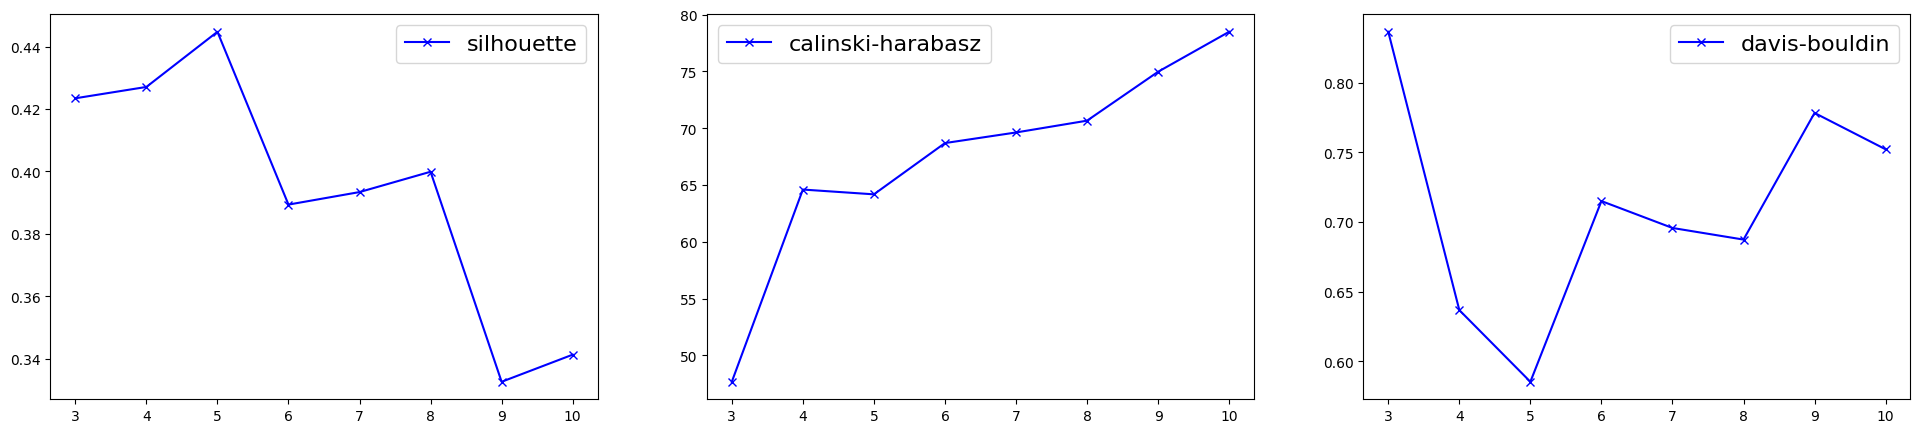

In [26]:
#узнаем оптимальное количество кластеров для метода AgglomerativeClustering
def plot_metrics(cluster_num, X):
    agglomerative_clustering =  AgglomerativeClustering(n_clusters=cluster_num)
    agglomerative_clustering.fit(X)
    silhouette_element = metrics.silhouette_score(X, agglomerative_clustering.labels_, metric='euclidean') 
    calinski_harabasz_element = metrics.calinski_harabasz_score(X, agglomerative_clustering.labels_)  
    davis_bouldin_element = metrics.davies_bouldin_score(X, agglomerative_clustering.labels_) 
    
    return silhouette_element, calinski_harabasz_element, davis_bouldin_element

silhouettes_list = []
calinski_harabasz_list = []
davis_bouldin_list = []
#перебираем количество от 3 до 10 включительно
for i in range(3, 11):
    silhouette_element, calinski_harabasz_element, davis_bouldin_element = plot_metrics(i, X)
    silhouettes_list.append(silhouette_element)
    calinski_harabasz_list.append(calinski_harabasz_element)
    davis_bouldin_list.append(davis_bouldin_element)
    
# строим графики для выбранных метрик для выбора количества кластеров   
fig, ax = plt.subplots(1, 3, figsize=(24,5))
    
ax[0].plot(range(3, 11), silhouettes_list, 'xb-', label='silhouette')
ax[1].plot(range(3, 11), calinski_harabasz_list, 'xb-', label='calinski-harabasz')
ax[2].plot(range(3, 11), davis_bouldin_list, 'xb-', label='davis-bouldin')
ax[0].legend(prop={'size': 16})
ax[1].legend(prop={'size': 16})
ax[2].legend(prop={'size': 16})


Коэффициент силуэта указывает разбиение на 5 кластеров. Коэффициент Калински-Харабаса дает 10 кластеров, коэффициент Дэвиса-Болдина указывает на 5 кластеров. Примем значение числа кластеров равное 5.

<Axes: xlabel='axis-1', ylabel='axis-2'>

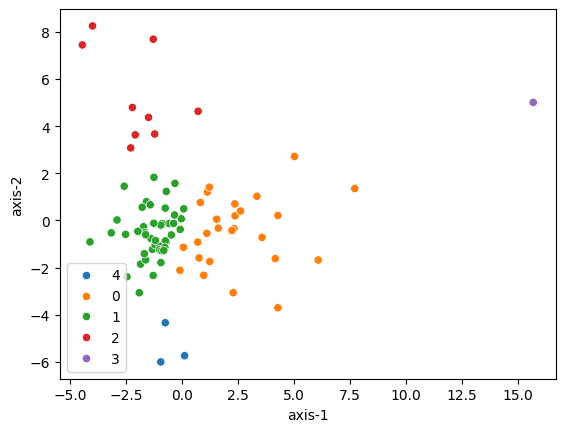

In [27]:
# оптимальное количество кластеров=5, строим модель
model_agglomerative = AgglomerativeClustering(n_clusters=5)
model_agglomerative.fit(X)

#посмотрим на график
sns.scatterplot(data=X, x='axis-1', y='axis-2', hue=model_agglomerative.labels_.astype('str'))

In [28]:
# рассчитываем и запоминаем метрики
add_list_metrics(X, model_agglomerative.labels_, 
                 model_KMeans, len(set(model_agglomerative.labels_)), 
                 np.bincount(model_agglomerative.labels_), baseline.labels_)

Silhouette: -0.110
Calinski-Harabatz: 49.069
Davis-Bouldin: 4.760
Индекс Рэнда (сравнение с базовой моделью): 0.723
Размеры кластеров:  [26 46  9  1  3]


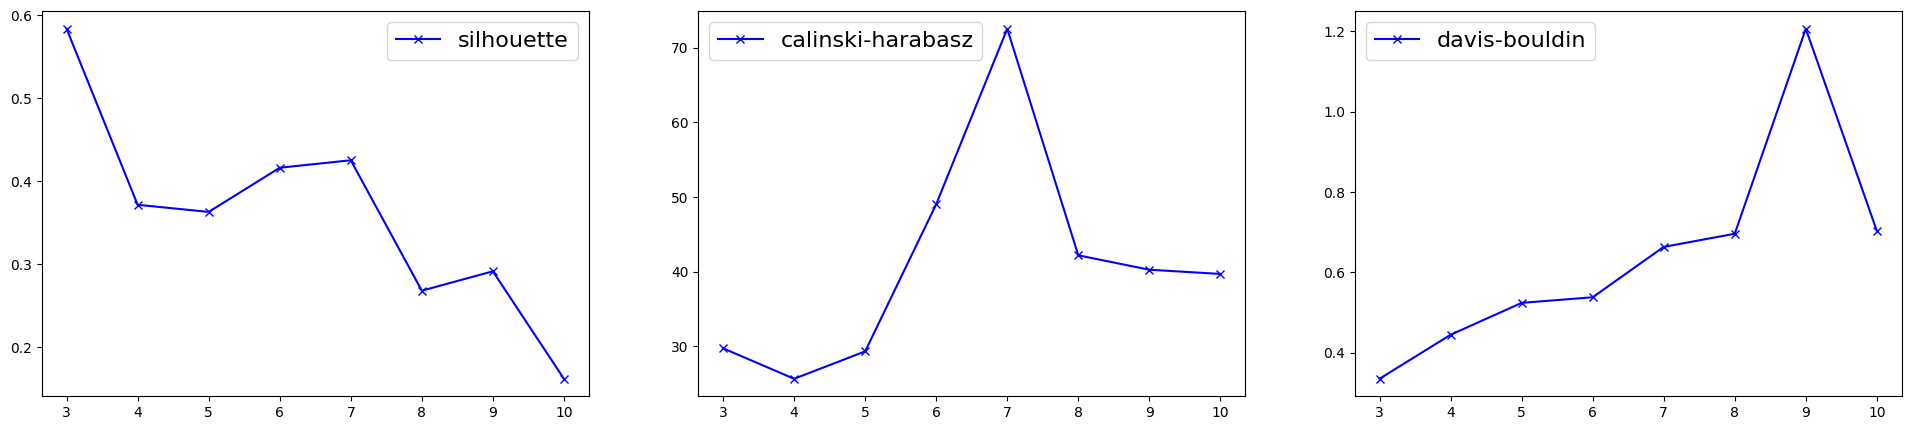

In [29]:
#узнаем оптимальное количество кластеров для метода SpectralClustering
def plot_metrics(cluster_num, X):
    spectral_clustering =  SpectralClustering(n_clusters=cluster_num, random_state=42)
    spectral_clustering.fit(X)
    silhouette_element = metrics.silhouette_score(X, spectral_clustering.labels_, metric='euclidean') 
    calinski_harabasz_element = metrics.calinski_harabasz_score(X, spectral_clustering.labels_)  
    davis_bouldin_element = metrics.davies_bouldin_score(X, spectral_clustering.labels_) 
    
    return silhouette_element, calinski_harabasz_element, davis_bouldin_element

silhouettes_list = []
calinski_harabasz_list = []
davis_bouldin_list = []
#перебираем количество от 3 до 10 включительно
for i in range(3, 11):
    silhouette_element, calinski_harabasz_element, davis_bouldin_element = plot_metrics(i, X)
    silhouettes_list.append(silhouette_element)
    calinski_harabasz_list.append(calinski_harabasz_element)
    davis_bouldin_list.append(davis_bouldin_element)
    
# строим графики для выбранных метрик для выбора количества кластеров   
fig, ax = plt.subplots(1, 3, figsize=(24,5))
    
ax[0].plot(range(3, 11), silhouettes_list, 'xb-', label='silhouette')
ax[1].plot(range(3, 11), calinski_harabasz_list, 'xb-', label='calinski-harabasz')
ax[2].plot(range(3, 11), davis_bouldin_list, 'xb-', label='davis-bouldin')
ax[0].legend(prop={'size': 16})
ax[1].legend(prop={'size': 16})
ax[2].legend(prop={'size': 16})

Коэффициент силуэта указывает на 3 кластера. Коэффициент Калински-Харабаса указывает на оптимальное количество кластеров равное 7, коэффициент Дэвиса-Болдина на 3 кластеров. Примем значение числа кластеров равное 7.

<Axes: xlabel='axis-1', ylabel='axis-2'>

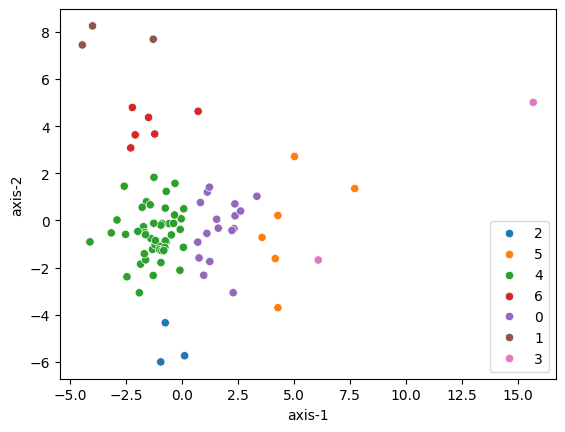

In [30]:
# оптимальное количество кластеров=7, строим модель
spectral_clustering = SpectralClustering(n_clusters=7)
spectral_clustering.fit(X)

# рисуем график
sns.scatterplot(data=X, x='axis-1', y='axis-2', hue=spectral_clustering.labels_.astype('str'))

In [31]:
# рассчитываем и запоминаем метрики
add_list_metrics(X, spectral_clustering.labels_, 
                 model_KMeans, len(set(spectral_clustering.labels_)), 
                 np.bincount(spectral_clustering.labels_), baseline.labels_)

Silhouette: -0.169
Calinski-Harabatz: 12.047
Davis-Bouldin: 18.518
Индекс Рэнда (сравнение с базовой моделью): 0.737
Размеры кластеров:  [17  3  3  2 48  6  6]


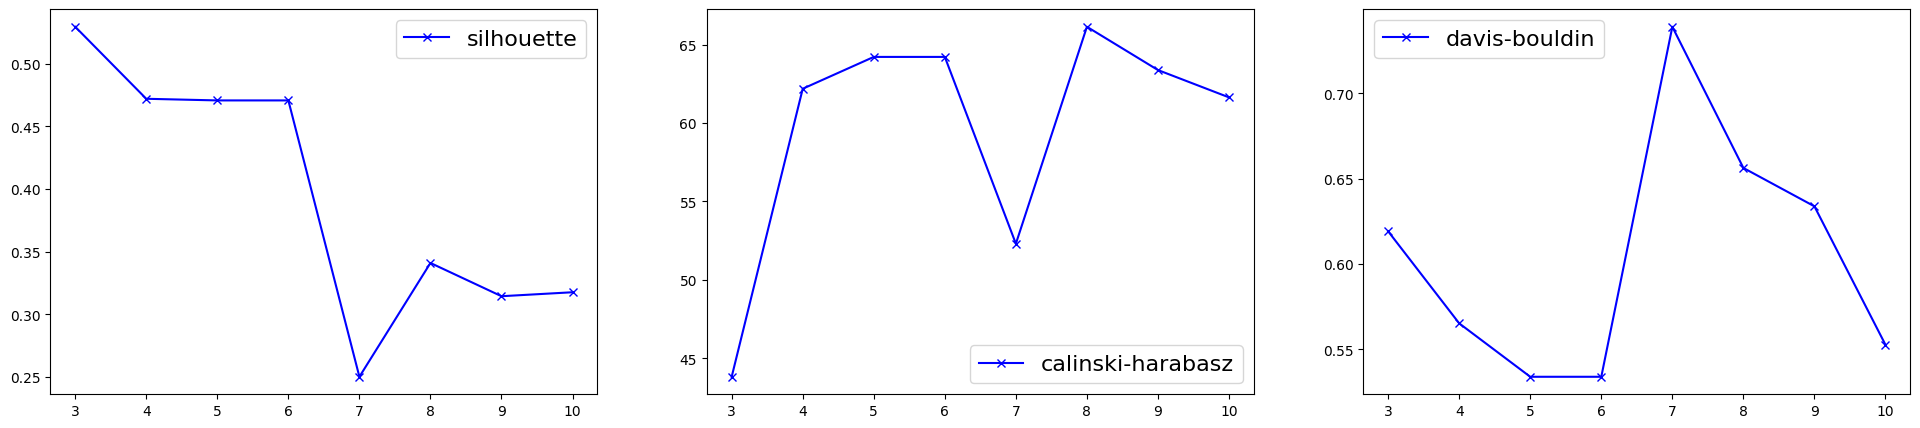

In [32]:
#узнаем оптимальное количество кластеров для метода GaussianMixture
def plot_metrics(cluster_num, X):
    gm_clustering =  GaussianMixture(n_components=cluster_num, random_state=42, covariance_type='tied')
    silhouette_element = metrics.silhouette_score(X, gm_clustering.fit_predict(X), metric='euclidean') 
    calinski_harabasz_element = metrics.calinski_harabasz_score(X, gm_clustering.fit_predict(X))  
    davis_bouldin_element = metrics.davies_bouldin_score(X, gm_clustering.fit_predict(X)) 
    
    return silhouette_element, calinski_harabasz_element, davis_bouldin_element

silhouettes_list = []
calinski_harabasz_list = []
davis_bouldin_list = []
#перебираем количество от 3 до 10 включительно
for i in range(3, 11):
    silhouette_element, calinski_harabasz_element, davis_bouldin_element = plot_metrics(i, X)
    silhouettes_list.append(silhouette_element)
    calinski_harabasz_list.append(calinski_harabasz_element)
    davis_bouldin_list.append(davis_bouldin_element)
    
# строим графики для выбранных метрик для выбора количества кластеров   
fig, ax = plt.subplots(1, 3, figsize=(24,5))
    
ax[0].plot(range(3, 11), silhouettes_list, 'xb-', label='silhouette')
ax[1].plot(range(3, 11), calinski_harabasz_list, 'xb-', label='calinski-harabasz')
ax[2].plot(range(3, 11), davis_bouldin_list, 'xb-', label='davis-bouldin')
ax[0].legend(prop={'size': 16})
ax[1].legend(prop={'size': 16})
ax[2].legend(prop={'size': 16})

Коэффициент силуэта указывает на 4 - 6 кластеров. Коэффициент Калински-Харабаса указывает на оптимальное количество кластеров равное 8, коэффициент Дэвиса-Болдина - на 5-6 кластеров. Примем значение числа кластеров равное 5.

<Axes: xlabel='axis-1', ylabel='axis-2'>

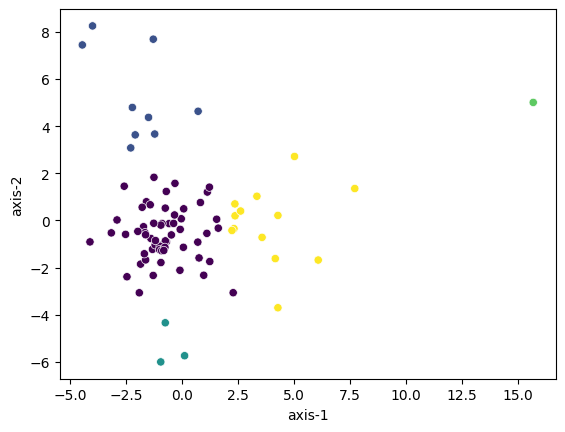

In [33]:
# оптимальное количество кластеров=5, строим модель
gm_clustering = GaussianMixture(n_components=5, random_state=42, covariance_type='tied')
gm_clustering.fit(X)
gm_prediction = gm_clustering.predict(X)

#график
sns.scatterplot(x=X['axis-1'], y=X['axis-2'], c=gm_prediction)

In [34]:
# рассчитываем и запоминаем метрики
add_list_metrics(X, gm_prediction, 
                 gm_prediction, len(set(gm_prediction)), 
                 np.bincount(gm_prediction), baseline.labels_)

Silhouette: -0.134
Calinski-Harabatz: 54.212
Davis-Bouldin: 1.748
Индекс Рэнда (сравнение с базовой моделью): 0.628
Размеры кластеров:  [59  9  3  1 13]


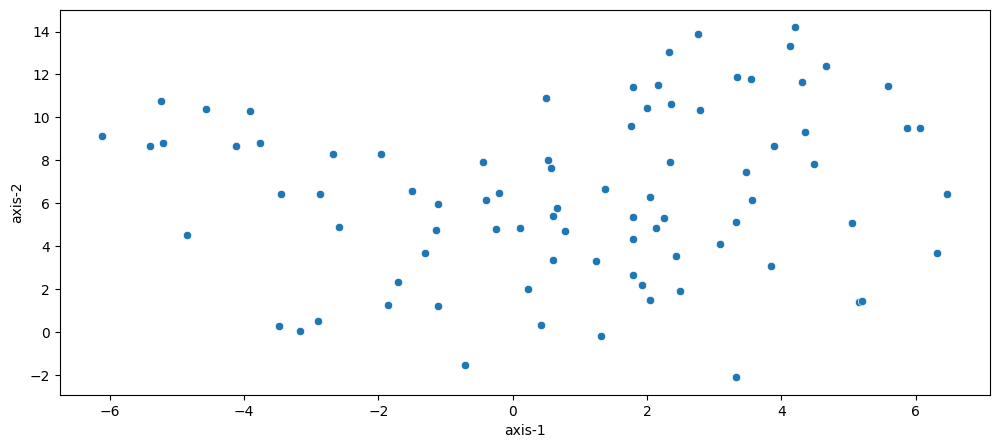

In [35]:
# применим другой метод понижения размерности - TSNE
t_sne = TSNE(n_components=2, perplexity=20, random_state=42)
pipe = Pipeline(steps=[('scaler', scaler), ('t_sne', t_sne)])
X = pipe.fit_transform(df)
X = pd.DataFrame(X, columns=['axis-1', 'axis-2'])

fig = plt.figure(figsize=(12, 5))
sns.scatterplot(data=X, x='axis-1', y='axis-2');

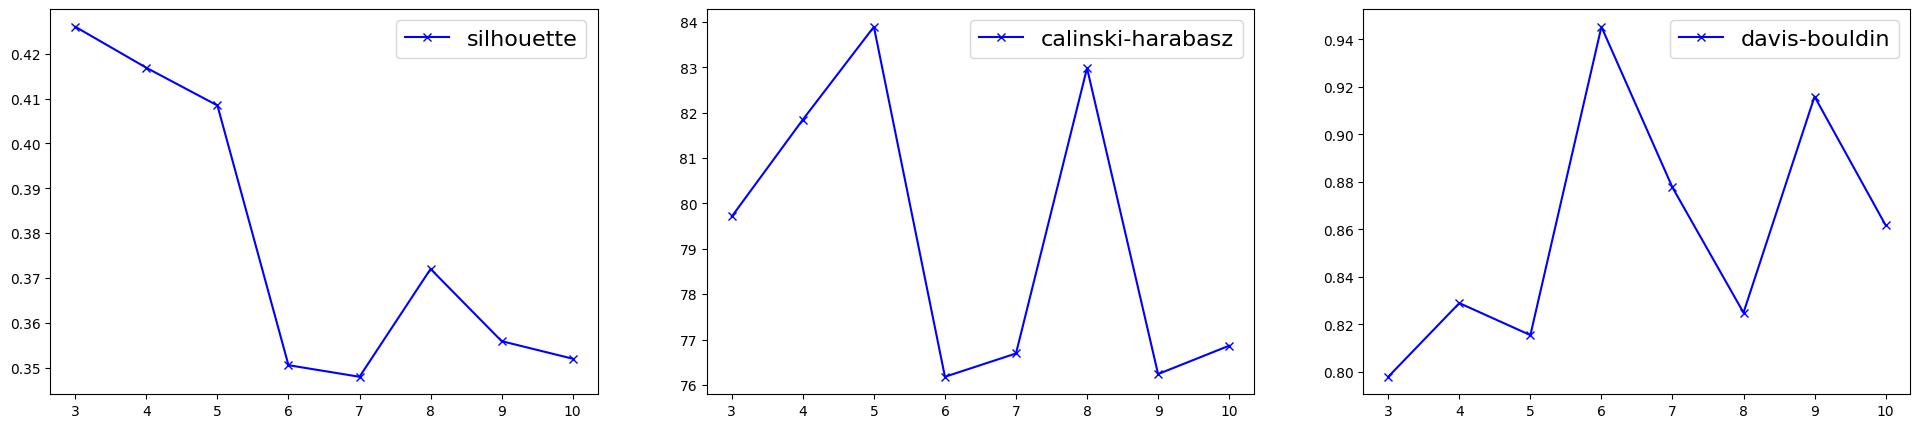

In [36]:
#узнаем оптимальное количество кластеров для метода KMeans
def plot_metrics(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    silhouette_element = metrics.silhouette_score(X, k_means.labels_, metric='euclidean') 
    calinski_harabasz_element = metrics.calinski_harabasz_score(X, k_means.labels_)  
    davis_bouldin_element = metrics.davies_bouldin_score(X, k_means.labels_) 
    
    return silhouette_element, calinski_harabasz_element, davis_bouldin_element

silhouettes_list = []
calinski_harabasz_list = []
davis_bouldin_list = []
#перебираем количество от 3 до 10 включительно
for i in range(3, 11):
    silhouette_element, calinski_harabasz_element, davis_bouldin_element = plot_metrics(i, X)
    silhouettes_list.append(silhouette_element)
    calinski_harabasz_list.append(calinski_harabasz_element)
    davis_bouldin_list.append(davis_bouldin_element)
    
# строим графики для выбранных метрик для выбора количества кластеров   
fig, ax = plt.subplots(1, 3, figsize=(24,5))
    
ax[0].plot(range(3, 11), silhouettes_list, 'xb-', label='silhouette')
ax[1].plot(range(3, 11), calinski_harabasz_list, 'xb-', label='calinski-harabasz')
ax[2].plot(range(3, 11), davis_bouldin_list, 'xb-', label='davis-bouldin')
ax[0].legend(prop={'size': 16})
ax[1].legend(prop={'size': 16})
ax[2].legend(prop={'size': 16})

Коэффициент силуэта указывает на 3 кластера. Коэффициент Калински-Харабаса указывает на оптимальное количество кластеров равное 5 или 8, коэффициент Дэвиса-Болдина - на 3 или 5 кластеров. Примем значение числа кластеров равное 6.

<Axes: xlabel='axis-1', ylabel='axis-2'>

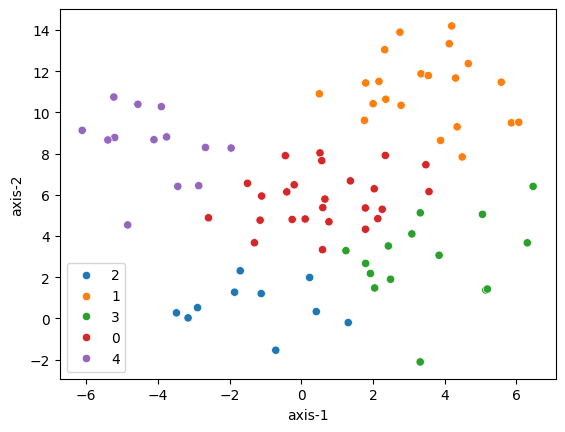

In [37]:
# оптимальное количество кластеров=5, строим модель
model_KMeans = KMeans(n_clusters=5, random_state=42)
model_KMeans.fit(X)

#рисуем график
sns.scatterplot(data=X, x='axis-1', y='axis-2', hue=model_KMeans.labels_.astype('str'))

In [38]:
# рассчитываем и запоминаем метрики
add_list_metrics(X, model_KMeans.labels_, model_KMeans,
                 len(set(model_KMeans.labels_)), 
                 np.bincount(model_KMeans.labels_), baseline.labels_)

Silhouette: -0.122
Calinski-Harabatz: 7.176
Davis-Bouldin: 19.180
Индекс Рэнда (сравнение с базовой моделью): 0.315
Размеры кластеров:  [25 21 10 16 13]


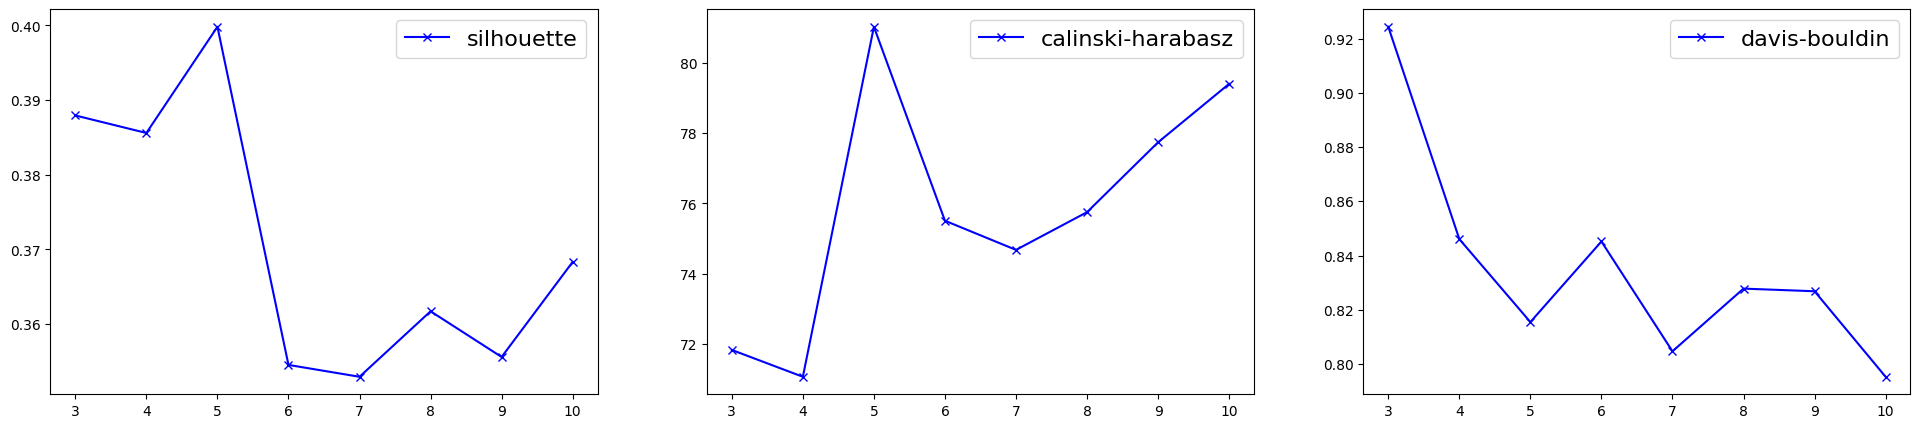

In [39]:
#узнаем оптимальное количество кластеров для метода AgglomerativeClustering
def plot_metrics(cluster_num, X):
    agglomerative_clustering =  AgglomerativeClustering(n_clusters=cluster_num)
    agglomerative_clustering.fit(X)
    silhouette_element = metrics.silhouette_score(X, agglomerative_clustering.labels_, metric='euclidean') 
    calinski_harabasz_element = metrics.calinski_harabasz_score(X, agglomerative_clustering.labels_)  
    davis_bouldin_element = metrics.davies_bouldin_score(X, agglomerative_clustering.labels_) 
    
    return silhouette_element, calinski_harabasz_element, davis_bouldin_element

silhouettes_list = []
calinski_harabasz_list = []
davis_bouldin_list = []
#перебираем количество от 3 до 10 включительно
for i in range(3, 11):
    silhouette_element, calinski_harabasz_element, davis_bouldin_element = plot_metrics(i, X)
    silhouettes_list.append(silhouette_element)
    calinski_harabasz_list.append(calinski_harabasz_element)
    davis_bouldin_list.append(davis_bouldin_element)
    
# строим графики для выбранных метрик для выбора количества кластеров   
fig, ax = plt.subplots(1, 3, figsize=(24,5))
    
ax[0].plot(range(3, 11), silhouettes_list, 'xb-', label='silhouette')
ax[1].plot(range(3, 11), calinski_harabasz_list, 'xb-', label='calinski-harabasz')
ax[2].plot(range(3, 11), davis_bouldin_list, 'xb-', label='davis-bouldin')
ax[0].legend(prop={'size': 16})
ax[1].legend(prop={'size': 16})
ax[2].legend(prop={'size': 16})

Коэффициент силуэта указывает на 5 кластеров. Коэффициент Калински-Харабаса указывает на оптимальное количество кластеров равное 5, коэффициент Дэвиса-Болдина - на 5, 7 или 10 кластеров. Примем значение числа кластеров равное 5.

<Axes: xlabel='axis-1', ylabel='axis-2'>

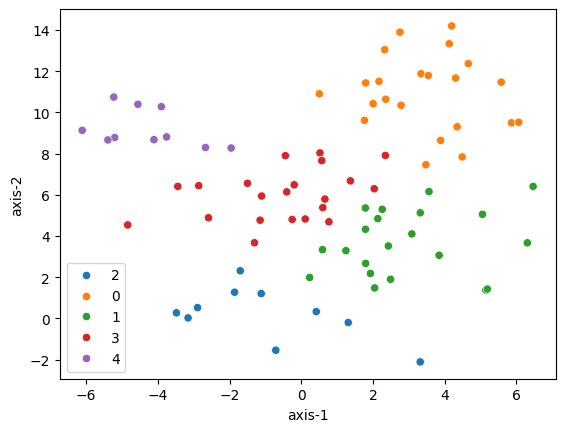

In [40]:
# оптимальное количество кластеров = 5, строим модель
agglomerative_clustering = AgglomerativeClustering(n_clusters=5)
agglomerative_clustering.fit(X)

#рисуем график
sns.scatterplot(data=X, x='axis-1', y='axis-2', hue=agglomerative_clustering.labels_.astype('str'))

In [41]:
# рассчитываем и запоминаем метрики
add_list_metrics(X, agglomerative_clustering.labels_, 
                 agglomerative_clustering,
                 len(set(agglomerative_clustering.labels_)), 
                 np.bincount(agglomerative_clustering.labels_), baseline.labels_)

Silhouette: -0.125
Calinski-Harabatz: 7.365
Davis-Bouldin: 17.006
Индекс Рэнда (сравнение с базовой моделью): 0.318
Размеры кластеров:  [22 21 11 21 10]


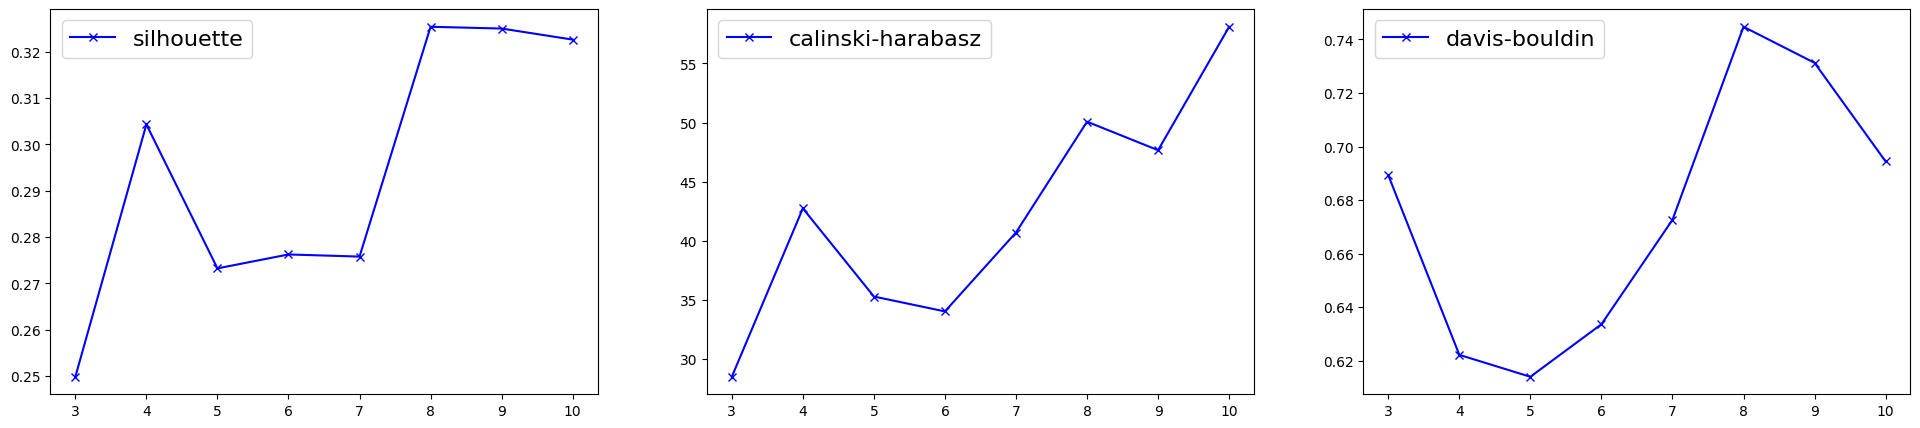

In [42]:
#узнаем оптимальное количество кластеров для метода SpectralClustering
def plot_metrics(cluster_num, X):
    spectral_clustering =  SpectralClustering(n_clusters=cluster_num, random_state=42)
    spectral_clustering.fit(X)
    silhouette_element = metrics.silhouette_score(X, spectral_clustering.labels_, metric='euclidean') 
    calinski_harabasz_element = metrics.calinski_harabasz_score(X, spectral_clustering.labels_)  
    davis_bouldin_element = metrics.davies_bouldin_score(X, spectral_clustering.labels_) 
    
    return silhouette_element, calinski_harabasz_element, davis_bouldin_element

silhouettes_list = []
calinski_harabasz_list = []
davis_bouldin_list = []
#перебираем количество от 3 до 10 включительно
for i in range(3, 11):
    silhouette_element, calinski_harabasz_element, davis_bouldin_element = plot_metrics(i, X)
    silhouettes_list.append(silhouette_element)
    calinski_harabasz_list.append(calinski_harabasz_element)
    davis_bouldin_list.append(davis_bouldin_element)
    
# строим графики для выбранных метрик для выбора количества кластеров   
fig, ax = plt.subplots(1, 3, figsize=(24,5))
    
ax[0].plot(range(3, 11), silhouettes_list, 'xb-', label='silhouette')
ax[1].plot(range(3, 11), calinski_harabasz_list, 'xb-', label='calinski-harabasz')
ax[2].plot(range(3, 11), davis_bouldin_list, 'xb-', label='davis-bouldin')
ax[0].legend(prop={'size': 16})
ax[1].legend(prop={'size': 16})
ax[2].legend(prop={'size': 16})

Коэффициент силуэта указывает на 10 кластеров. Коэффициент Калински-Харабаса указывает на оптимальное колличество кластеров равное 10, коэффициент Дэвиса-Болдина - на 5 кластера. Примем значение числа кластеров равное 10.

<Axes: xlabel='axis-1', ylabel='axis-2'>

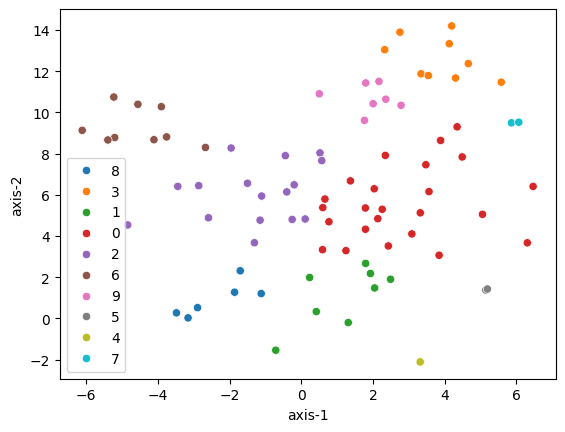

In [43]:
# оптимальное количество кластеров=10, строим модель
spectral_clustering = SpectralClustering(n_clusters=10, random_state=42)
spectral_clustering.fit(X)

#рисуем график
sns.scatterplot(data=X, x='axis-1', y='axis-2', hue=spectral_clustering.labels_.astype('str'))

In [44]:
# рассчитываем и запоминаем метрики
add_list_metrics(X, spectral_clustering.labels_, spectral_clustering,
                 len(set(spectral_clustering.labels_)), 
                 np.bincount(spectral_clustering.labels_), baseline.labels_)

Silhouette: -0.343
Calinski-Harabatz: 5.146
Davis-Bouldin: 7.316
Индекс Рэнда (сравнение с базовой моделью): 0.220
Размеры кластеров:  [24  8 16  9  2  2  9  2  6  7]


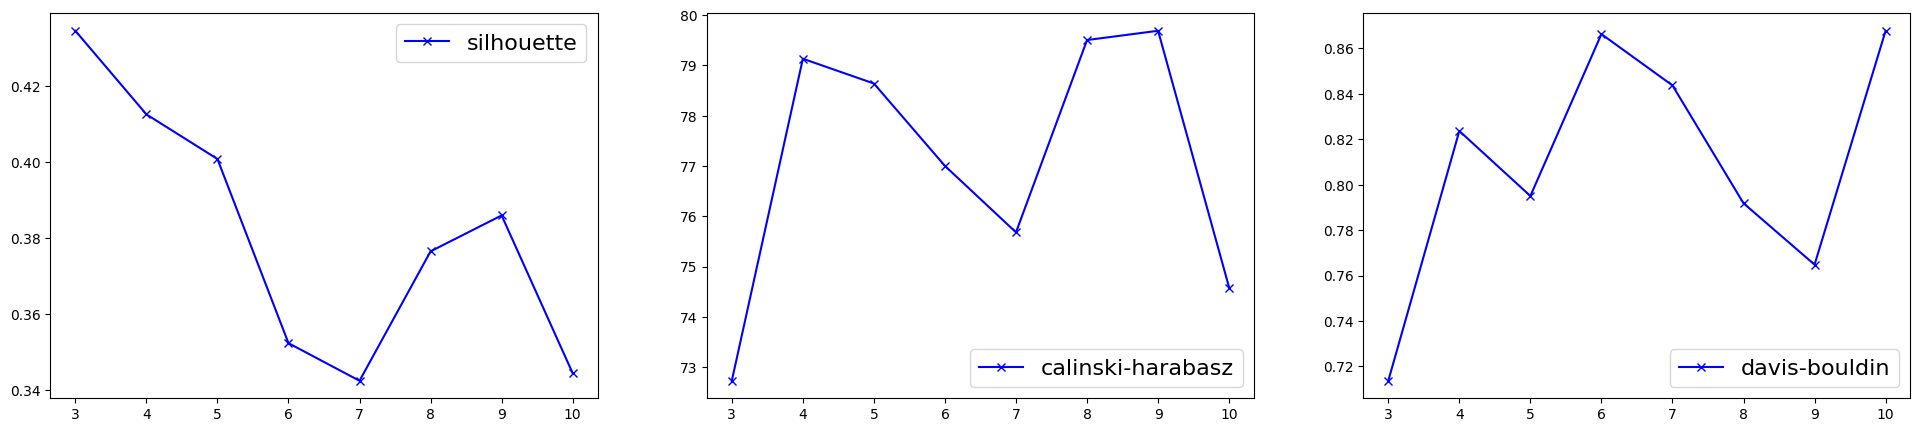

In [45]:
#узнаем оптимальное количество кластеров для метода GaussianMixture
def plot_metrics(cluster_num, X):
    gm_clustering =  GaussianMixture(n_components=cluster_num, random_state=42, covariance_type='tied')
    silhouette_element = metrics.silhouette_score(X, gm_clustering.fit_predict(X), metric='euclidean') 
    calinski_harabasz_element = metrics.calinski_harabasz_score(X, gm_clustering.fit_predict(X))  
    davis_bouldin_element = metrics.davies_bouldin_score(X, gm_clustering.fit_predict(X)) 
    
    return silhouette_element, calinski_harabasz_element, davis_bouldin_element

silhouettes_list = []
calinski_harabasz_list = []
davis_bouldin_list = []
#перебираем количество от 3 до 10 включительно
for i in range(3, 11):
    silhouette_element, calinski_harabasz_element, davis_bouldin_element = plot_metrics(i, X)
    silhouettes_list.append(silhouette_element)
    calinski_harabasz_list.append(calinski_harabasz_element)
    davis_bouldin_list.append(davis_bouldin_element)
    
# строим графики для выбранных метрик для выбора количества кластеров   
fig, ax = plt.subplots(1, 3, figsize=(24,5))
    
ax[0].plot(range(3, 11), silhouettes_list, 'xb-', label='silhouette')
ax[1].plot(range(3, 11), calinski_harabasz_list, 'xb-', label='calinski-harabasz')
ax[2].plot(range(3, 11), davis_bouldin_list, 'xb-', label='davis-bouldin')
ax[0].legend(prop={'size': 16})
ax[1].legend(prop={'size': 16})
ax[2].legend(prop={'size': 16})

Коэффициент силуэта указывает на 3 кластера. Коэффициент Калински-Харабаса указывает на оптимальное колличество кластеров равное 8 или 9, коэффициент Дэвиса-Болдина - на 3 кластера. Примем значение числа кластеров равное 3.

<Axes: xlabel='axis-1', ylabel='axis-2'>

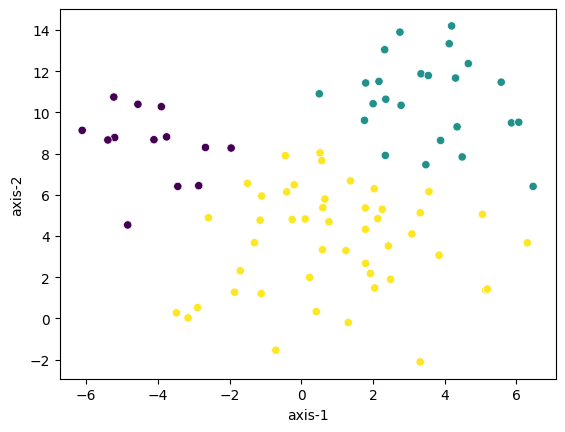

In [46]:
# оптимальное количество кластеров=3, строим модель
gm_clustering = GaussianMixture(n_components=3, random_state=42, covariance_type='tied')
gm_clustering.fit(X)
gm_prediction = gm_clustering.predict(X)

#рисуем график
sns.scatterplot(x=X['axis-1'], y=X['axis-2'], c=gm_prediction)

In [47]:
# рассчитываем и запоминаем метрики
add_list_metrics(X, gm_prediction, gm_prediction,
                 len(set(gm_prediction)), 
                 np.bincount(gm_prediction), baseline.labels_)

Silhouette: 0.197
Calinski-Harabatz: 12.602
Davis-Bouldin: 2.157
Индекс Рэнда (сравнение с базовой моделью): 0.680
Размеры кластеров:  [13 24 48]


In [48]:
# объединяем данные в однц таблицу
data_metrics = {'models': ['PCA+KMeans (baseline)',
                           'PCA+AgglomerativeClustering', 
                           'PCA+SpectralClustering', 
                           'PCA+GaussianMixture',  
                           'TSNE+KMeans', 
                           'TSNE+AgglomerativeClustering', 
                           'TSNE+ SpectralClustering', 
                           'TSNE+GaussianMixture'], 
                'count of clusters': clusters,
                'Размеры кластеров': clusters_sizes,
                'silhouette': silhouette,
                'calinski_harabasz': calinski_harabasz,
                'davies_bouldin': davies_bouldin,
                'index Rand': rand}
metrics_table = pd.DataFrame.from_dict(data_metrics, orient='index').T 
metrics_table

models count of clusters  \
0         PCA+KMeans (baseline)                 4   
1   PCA+AgglomerativeClustering                 5   
2        PCA+SpectralClustering                 7   
3           PCA+GaussianMixture                 5   
4                   TSNE+KMeans                 5   
5  TSNE+AgglomerativeClustering                 5   
6      TSNE+ SpectralClustering                10   
7          TSNE+GaussianMixture                 3   

                  Размеры кластеров silhouette calinski_harabasz  \
0                    [54, 9, 21, 1]   0.467193         68.988811   
1                 [26, 46, 9, 1, 3]   0.444723          64.18372   
2           [17, 3, 3, 2, 48, 6, 6]   0.409396         49.625195   
3                 [59, 9, 3, 1, 13]   0.470684          64.21219   
4              [25, 21, 10, 16, 13]    0.40848         83.893446   
5              [22, 21, 11, 21, 10]   0.399818         81.021657   
6  [24, 8, 16, 9, 2, 2, 9, 2, 6, 7]     0.3226          58.10298   
7                      [13, 24, 48]   0.434605         72.727276   

  davies_bouldin index Rand  
0       0.594943        1.0  
1       0.585256   0.722986  
2       0.875345   0.736859  
3       0.533924   0.627993  
4       0.815522   0.314973  
5       0.815473   0.318408  
6       0.694443   0.219595  
7       0.713642   0.680189

##### Промежуточные выводы:
1. Применение моделей кластеризации понижения размерности по методу главных компонент (*РСА*) имеет лучшие значения по коэффициентам силуэта (*silhouette*) и индекса Дэвиса-Болдина (*davies_bouldin*), чем аналогичные индексы стохастического вложения соседей с t-распределением (*TSNE*).  
2. Лучшими вариантами по коэффициенту силуэта - *PCA+GaussianMixture* и *TSNE+GaussianMixture*, наилучший коэффициент Калински-Харабаса (*calinski_harabasz*) у *PCA+SpectralClustering*, *TSNE+AgglomerativeClustering* и *TSNE+KMeans*, наилучший коэффициент по индексу Дэвиса-Болдина - все метрики по по методу главных компонент (*РСА*). Учитывая наилучшее значение метрики Калински-Харабаса (*calinski_harabasz*) и индексы стохастического вложения соседей с t-распределением (*TSNE*), остановим свой выбор числа кластеров по методу *TSNE+KMeans*.
3. Кластеризация по модели TSNE+KMeans имеет лучшую визуализацию.
4. В дальнейшем проведем анализ пяти кластеров, включающих в себя 85 субъектов РФ на основе 35 признаков. 

In [49]:
# понижаем размерность
t_sne = TSNE(n_components=2, perplexity=20, random_state=42)
pipe = Pipeline(steps=[('scaler', scaler), ('t_sne', t_sne)])
X = pipe.fit_transform(df)
X = pd.DataFrame(X, columns=['axis-1', 'axis-2'])

# сохраним модель кластеризации и датафрейм с метками кластеров
pipe = Pipeline([('scaler', scaler), 
                 ('TSNE', TSNE(n_components=2, perplexity=20, random_state=42)), 
                 ('KMeans', KMeans(n_clusters=5, random_state=42))])

# сохраним модель в виде pickle-файла
with open('data/model_2.pkl', 'wb') as pkl_file:
    pickle.dump(pipe, pkl_file)
    
# добавим метки кластеров в датасет
model_KMeans  = KMeans(n_clusters=5, random_state=42)
df['cluster'] = model_KMeans.fit_predict(X) 

# сохраним датафрейм с метками
df.to_csv('./outliers/data_labels.csv')

Описание датасета:
| Признак | Описание |
| - | - |
| per_capita | среднемесячный денежный доход на человека, в рублях|
| real_incomes | средние реальные денежные доходы, в процентах к предыдущему году|
| formal_wage | среднемесячная номинальная начисленная заработная плата на человека, в рублях|
| real_pay | средняя реальная начисленная заработная плата, в процентах к предыдущему году|
| child_mortality | средняя детская смертность, в процентах от количества новорожденных|
| disabled | средняя инвалидность среди трудоспособного возраста, в процентах к населению соответствующего возраста (оценочно)|
| alco | среднее количество впервые зарегистрированных алкогольных психозов на 100 тыс. населения|
| drug | среднее количество впервые зарегистрированных наркотических психозов на 100 тыс. населения|
| gross_regional_product | средний валовый региональный продукт (объем произведенных товаров и услуг) на душу населения, в рублях|
| living_area | средняя жилая площадь на человека|
| bad_conditions | процент респондентов, указавших на плохое состояние жилья|
| no_funds | процент респондентов, рассчитывающих на получение жилья от государства|
| general_morbidity | общая заболеваемость на 100 тыс. населения|
| congenital_malformation | средние значения врожденных пороков развития на 100 тыс. населения|
| psychosis | средние значения психических расстройств на 100 тыс. населения|
| teenage_pregnancy | усредненное значение подростковой беременности на 100 тыс. населения|
| population | среднее население, количество человек|
| reg_prod_total | усредненное значение региональных производств по всем видам деятельности на душу населения, в рублях|
| retail | усредненное значение розничной торговли на душу населения, в рублях|
| welfare | средние расходы регионального бюджета на социальную политику, в рублях на душу населения|
| crime_rate | средний уровень преступлений по годам|
| crime_growth_rate | средний темп прироста преступностей|
| serious_crimes | средний удельный вес тяжких преступлений|
| сrime_geography | средние значения коэффициентов территориального распределения преступности|
| life_expectancy | ожидаемая продолжительность жизни в 55 лет без инвалидности, год|
| employment_rate | уровень занятости пожилых, %|
| busy_retired | занятые в неформальном секторе экономики, %|
| below_the_subsistence_level | пожилые люди с доходами ниже прожиточного минимума, %|
| poor_elderly | бедные по самооценке пожилые люди, %|
| coverage_of_the_elderly | охват пожилых социальным обслуживанием, чел./100000|
| leisure_attendance | посещаемость пожилыми досуговых мероприятий, %|
| children_%  | средний процент детей среди всего населения, % от общей численности населения|
| poor_children | среднее количество детей среди малообеспеченного населения, чел.|
| poor_retired | среднее количество пенсионеров среди малообеспеченного населения, чел.|
| poor_employable | среднее количество людей трудоспособного возраста среди малообеспеченного населения, чел.|

## Выводы по части 2:
1) разведочный анализ данных показал, что большинство признаков имеют распределение отличного от нормального закона, вследствие чего можно предположить о наличии нескольких групп признаков. На основании анализа гистограмм изучаемых признаков и теста Шапиро было установлено, с вероятностью 0,95 распределение значений признаков среднее количество детей среди малообеспеченного населения (*poor_ children*), среднее количество людей трудоспособного возраста среди малообеспеченного населения (*poor_employable*), средний уровень преступлений (*crime_rate*), средний темп прироста преступностей (*crime_growth_rate*), ожидаемая продолжительность жизни в 55 лет без инвалидности (*life_expectancy*), бедные по самооценке пожилые люди (*poor_elderly*) и посещаемость пожилыми досуговых мероприятий (*leisure_attendance*) соотвествуют нормальному закону. Следует указать, что несмотря на наличие экстремальных значений (потенциально выбросов) в некоторых признаках, нет необходимости в их исключении, поскольку имеющиеся численные оценки носят достаточно объективный характер и отбрасывать некоторые регионы бессмысленно с точки зрения достижения целей кластеризации;
2) разведочный анализ данных показал, что имеются признаки с высокой мультиколлинеарностью. Удалив 7 признаков датасета, были спроектированы четыре новых признака: средний процент детей среди всего населения, % от общей численности населения (*children_%*), среднее количество детей среди малообеспеченного населения (*poor_children*), среднее количество пенсионеров среди малообеспеченного населения (*poor_retired*),среднее количество людей трудоспособного возраста среди малообеспеченного населения (*poor_employable*);
3) иерархический алгоритм кластеризации на основе метода Уорда не дает однозначного числа кластеров и очень сильно зависит от установления оптимальных значений минимального расстояния между кластерами (*Distance*). Так при установлении минимального расстояния между кластерами, равное 20 сформировано 5 кластеров, однако такое разделение весь разнородно по числу регионов, входящих в кластер. Например, в первом кластере - 8 субъектов РФ, во втором - 4, в третьем - 47 регионов, в четвертом - 1, пятый кластер формирует 25 регионов. При уменьшении расстояния до (*Distance* = 15) формируется большее число кластеров (6 шт.), среди которых 3 являются малочисленными (не более 5 регионов). Понять, какое оптимальное количество кластеров можно применить, будем использовать методы для понимажения размерности PCA и TSNE;
4) поиск оптимального числа кластеров показал, что применение моделей кластеризации понижения размерности по методу главных компонент (*РСА*) имеет лучшие значения по коэффициентам силуэта (*silhouette*) и индекса Дэвиса-Болдина (*davies_bouldin*), чем аналогичные индексы стохастического вложения соседей с t-распределением (*TSNE*). Учитывая наилучшее значение метрики Калински-Харабаса (*calinski_harabasz*) и индексы стохастического вложения соседей с t-распределением (*TSNE*), остановим свой выбор числа кластеров по методу *TSNE+KMeans*. Кластеризация по модели TSNE+KMeans имеет лучшую визуализацию. В дальнейшем проведем анализ пяти кластеров, включающих в себя 85 субъектов РФ на основе 35 признаков.